# Frecuencia de aperturas y su correlación con el éxito 

En el ajedrez, una apertura se refiere a las primeras jugadas iniciales de una partida. Es el inicio del juego donde los jugadores desarrollan sus piezas, controlan el centro del tablero y preparan sus posiciones para la fase intermedia del juego. Las aperturas son cruciales porque establecen las bases para el desarrollo posterior de la partida.

Las aperturas en el ajedrez generalmente se componen de una secuencia de movimientos iniciales. El número de movimientos en una apertura puede variar, pero típicamente abarca los primeros 10-15 movimientos de la partida. Sin embargo, no hay un número fijo y depende del estilo de juego y las elecciones específicas de los jugadores.

En este trabajo, se definirá "éxito" de una apertura como la consecuente victoria del jugador blanco sobre el negro.  
A continuación, se representa la tasa de éxito de las aperturas con más de 10 partidas jugadas. Hemos seleccionado las 10 primeras aperturas con mayor tasa de éxito.

/tmp/ipykernel_24475/3102226240.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Win Rate', y='Opening', data=sorted_data, palette='muted')


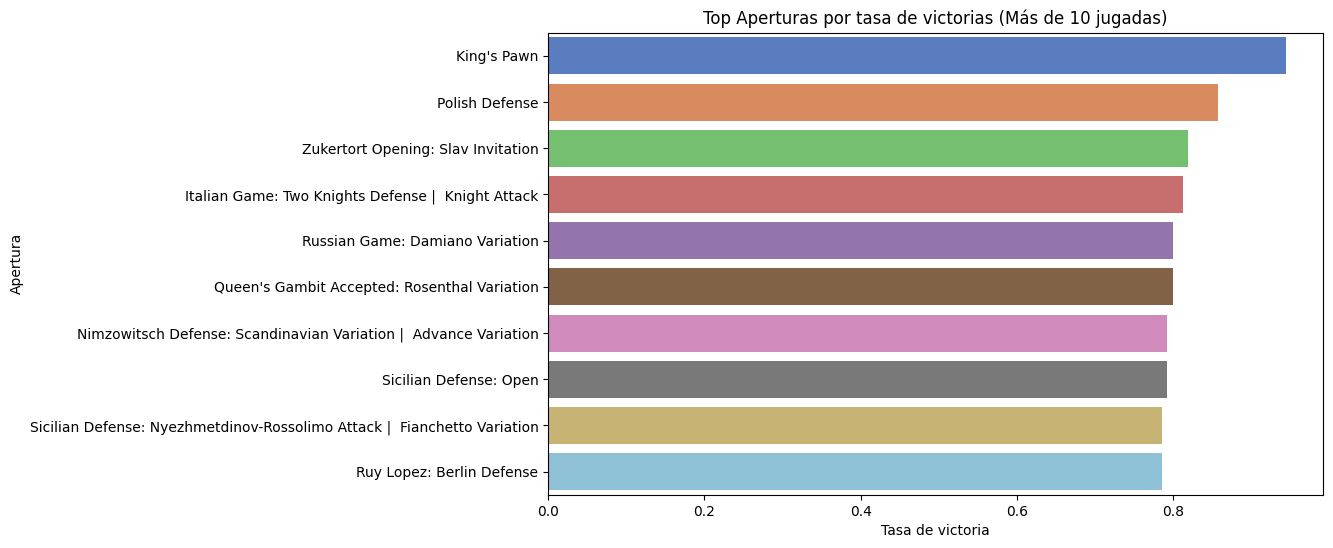

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('data/chess_data.csv')

opening_winner_counts = df.groupby(['opening_name', 'winner']).size().unstack(fill_value=0)

# Calculate the total number of games for each opening
opening_totals = opening_winner_counts.sum(axis=1)

# Filter openings with more than 10 games
valid_openings = opening_totals[opening_totals > 10].index

# Calculate the win rate for each opening
opening_win_rates = opening_winner_counts['white'] / opening_totals

# Filter win rates for valid openings
valid_opening_win_rates = opening_win_rates.loc[valid_openings]

# opening names and win rates
data = pd.DataFrame({'Opening': valid_opening_win_rates.index, 'Win Rate': valid_opening_win_rates.values})

sorted_data = data.sort_values(by='Win Rate', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Win Rate', y='Opening', data=sorted_data, palette='muted')
plt.title('Top Aperturas por tasa de victorias (Más de 10 jugadas)')
plt.xlabel('Tasa de victoria')
plt.ylabel('Apertura')
plt.show()


 También podemos visualizar las 50 mejores aperturas respecto a la tasa de éxito (victoria de las blancas)

/tmp/ipykernel_14612/198559456.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Win Rate', y='Opening', data=sorted_data, palette='muted')


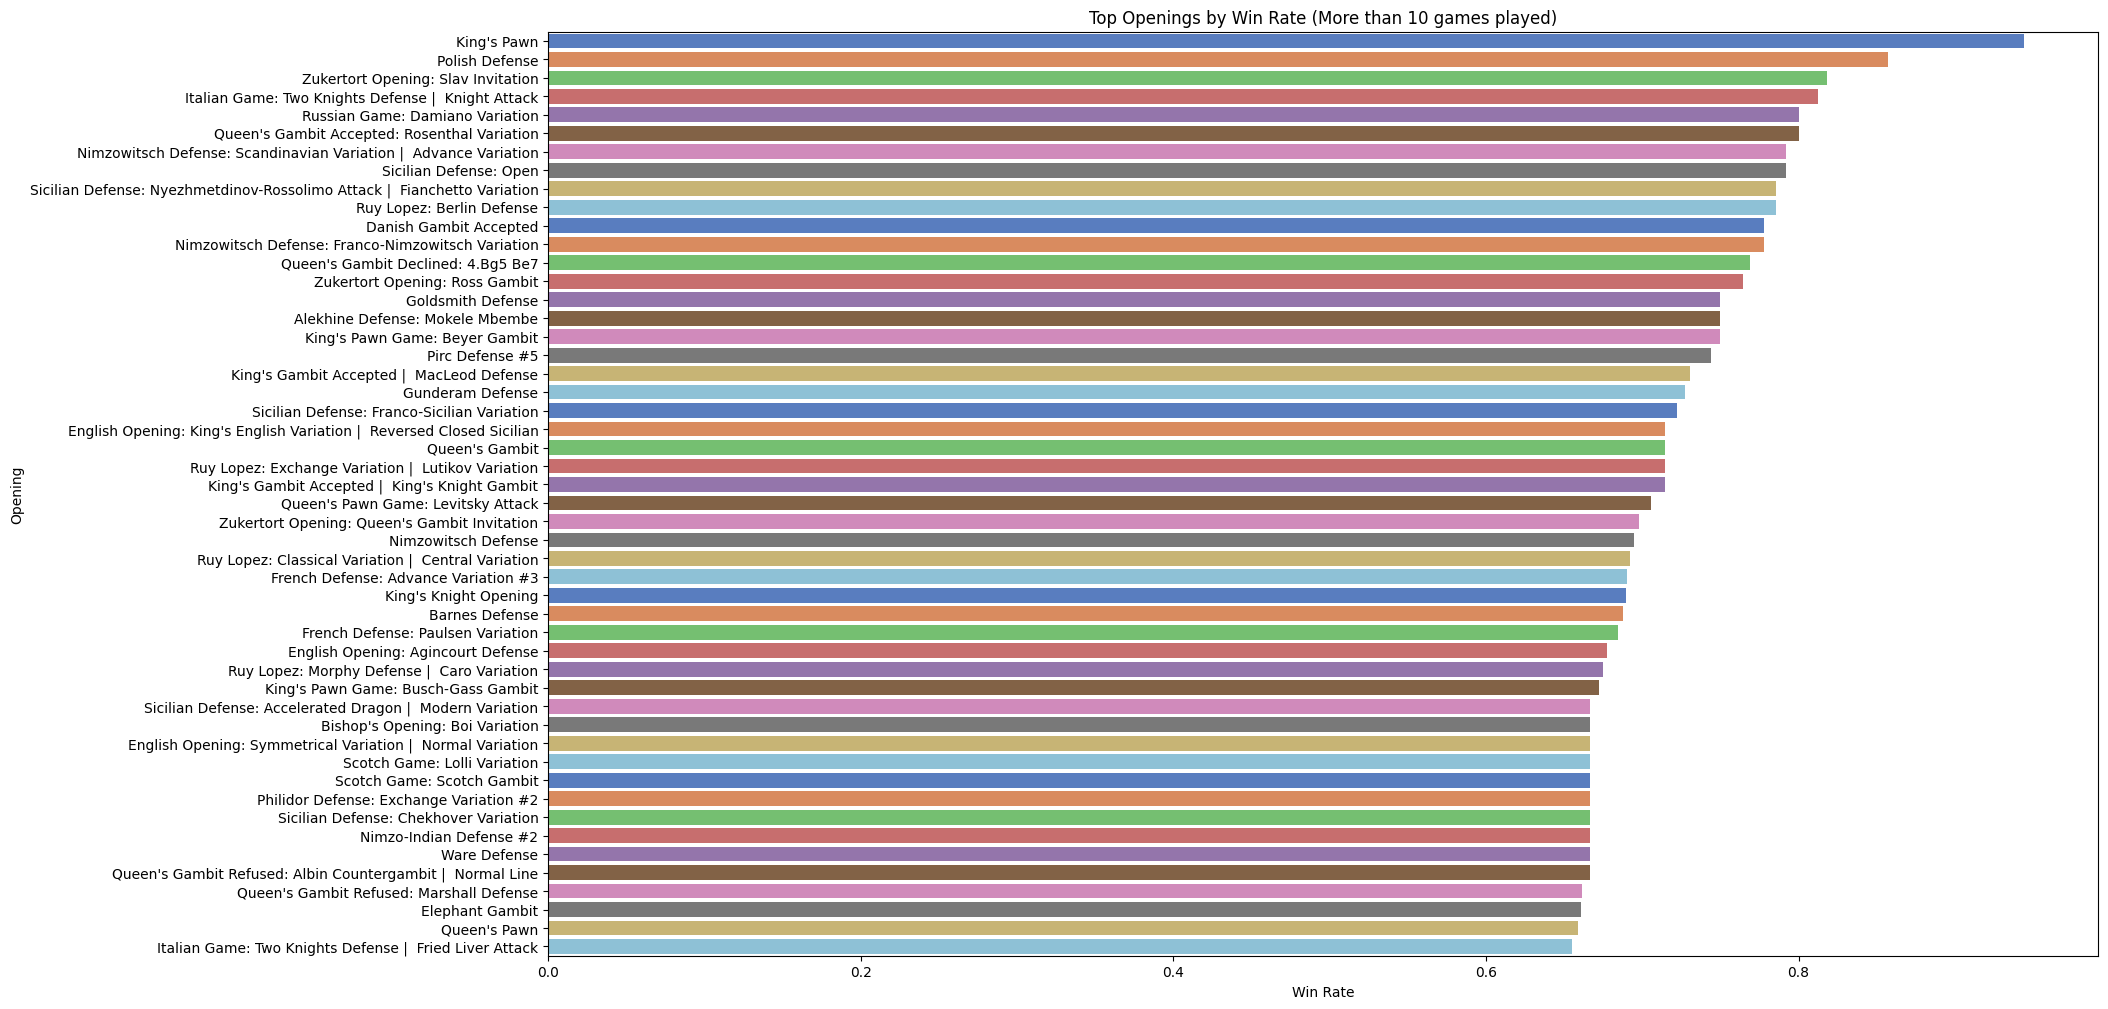

In [3]:
sorted_data = data.sort_values(by='Win Rate', ascending=False).head(50)
# Plot the top openings by win rate
plt.figure(figsize=(20, 12))
sns.barplot(x='Win Rate', y='Opening', data=sorted_data, palette='muted')
plt.title('Top Openings by Win Rate (More than 10 games played)')
plt.xlabel('Win Rate')
plt.ylabel('Opening')
plt.show()


Parece que "King's Pawn" tiene una tasa de éxito del 100%. Vamos a comprobarlo.

In [4]:
# Filtrar la tasa de éxito para la apertura 'King's Pawn'
success_rate_kings_pawn = opening_win_rates.loc["King's Pawn"]

print(f"Tasa de éxito para 'King's Pawn': {success_rate_kings_pawn}")

if success_rate_kings_pawn == 1.0:
    print("¡La tasa de éxito es del 100% para 'King's Pawn'!")
else:
    print("La tasa de éxito no es del 100% para 'King's Pawn'.")

Tasa de éxito para 'King's Pawn': 0.9444444444444444
La tasa de éxito no es del 100% para 'King's Pawn'.


## Tasa de éxito de las aperturas más frecuentes

Consideraremos ahora las aperturas que más aparecen en el conjunto de datos.

Tasas de éxito para las aperturas más frecuentes:
opening_name
Van't Kruijs Opening                             0.342391
Sicilian Defense                                 0.416201
Sicilian Defense: Bowdler Attack                 0.402027
Scotch Game                                      0.535055
French Defense: Knight Variation                 0.498155
Scandinavian Defense: Mieses-Kotroc Variation    0.633205
Queen's Pawn Game: Mason Attack                  0.500000
Queen's Pawn Game: Chigorin Variation            0.489083
Scandinavian Defense                             0.403587
Horwitz Defense                                  0.526316
dtype: float64


/tmp/ipykernel_14612/3527054526.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_opening_win_rates.values, y=top_opening_win_rates.index, palette='viridis')


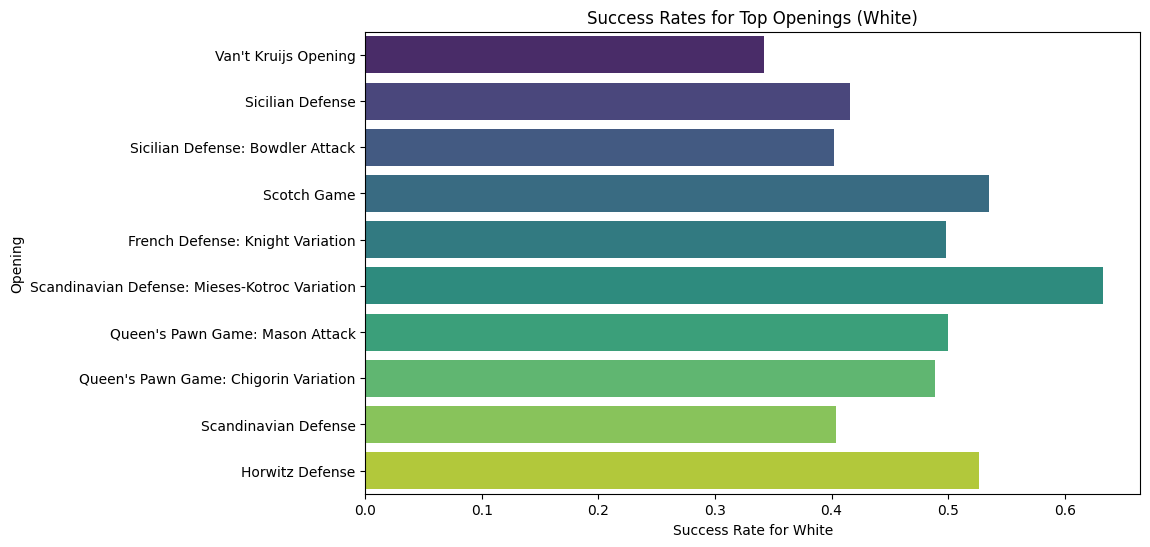

In [5]:
import pandas as pd

# Group the data by opening and winner, and count the occurrences
opening_winner_counts = df.groupby(['opening_name', 'winner']).size().unstack(fill_value=0)

# Calculate the total number of games for each opening
opening_totals = opening_winner_counts.sum(axis=1)

# Calculate the win rate for each opening
opening_win_rates = opening_winner_counts['white'] / opening_totals

# Filtrar para incluir solo las aperturas más frecuentes
top_openings = opening_totals.sort_values(ascending=False).head(10).index
top_opening_win_rates = opening_win_rates.loc[top_openings]

# Imprimir las tasas de éxito para las aperturas más frecuentes
print("Tasas de éxito para las aperturas más frecuentes:")
print(top_opening_win_rates)

# Plot the success rates for the top openings
plt.figure(figsize=(10, 6))
sns.barplot(x=top_opening_win_rates.values, y=top_opening_win_rates.index, palette='viridis')
plt.title('Success Rates for Top Openings (White)')
plt.xlabel('Success Rate for White')
plt.ylabel('Opening')
plt.show()

# Evolución del rating a lo largo del tiempo

Procederemos a realizar ahora ciertos estudios sobre los jugadores

In [4]:
import pandas as pd

# Filtrar jugadores que juegan más de 3 partidas
jugadores_mas_de_10_partidas = todos_los_jugadores.value_counts()[todos_los_jugadores.value_counts() > 10].index

# Filtrar el DataFrame original para incluir solo partidas con estos jugadores
df_jugadores_mas_de_10_partidas = df[df['white_id'].isin(jugadores_mas_de_10_partidas) | df['black_id'].isin(jugadores_mas_de_10_partidas)]

# Calcular la media de partidas jugadas por estos jugadores
media_partidas_jugadas = df_jugadores_mas_de_10_partidas.shape[0] / len(jugadores_mas_de_10_partidas)
print(f"Jugadores que juegan más de 10 partidas: {len(jugadores_mas_de_10_partidas)}")
print(f"Media de partidas jugadas por estos jugadores: {media_partidas_jugadas:.2f}")

Jugadores que juegan más de 10 partidas: 646
Media de partidas jugadas por estos jugadores: 26.53


Para estudiar la evolución del rating de cada jugador a lo largo del tiempo, necesitamos agrupar los datos por jugador y calcular la media del rating en cada punto temporal.
Elegiremos primero los 10 jugadores que más partidas han jugado.

## Estudio de los 10 jugadores que más partidas han jugado

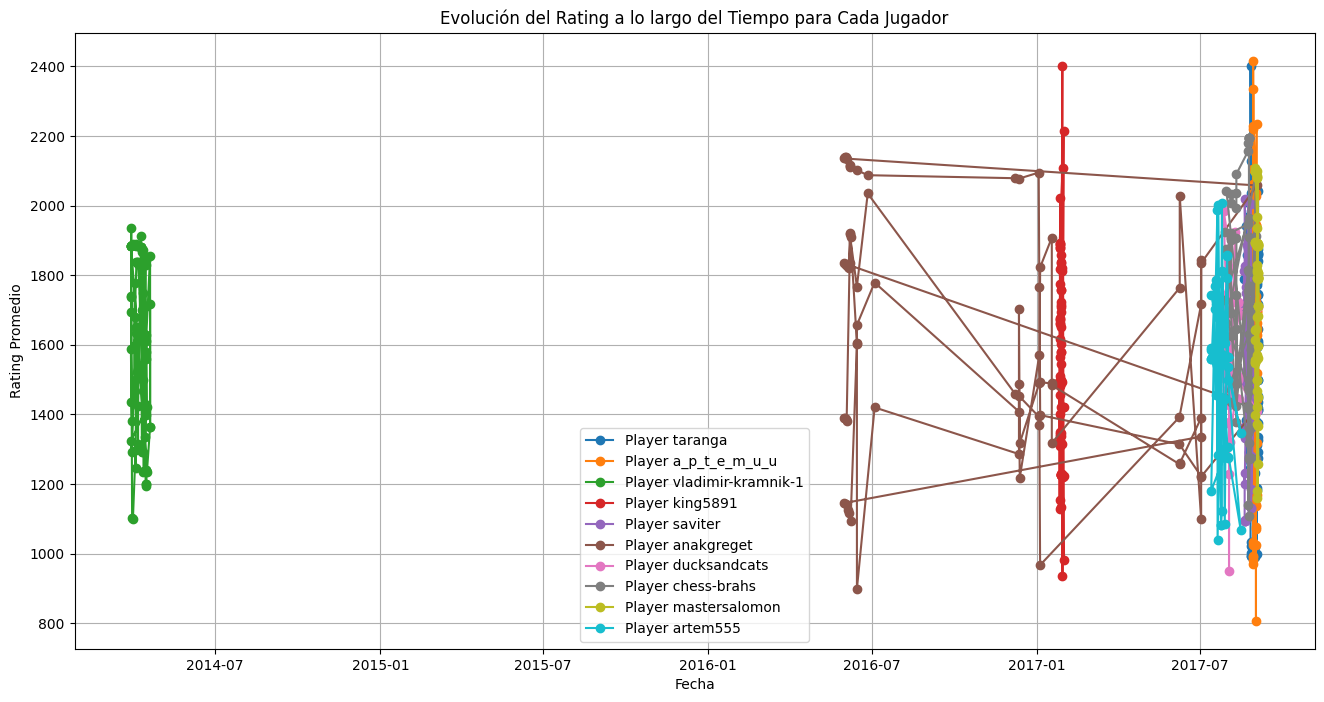

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

# Combine ratings for both white and black players, treating them as a single player
all_players = pd.concat([df[['white_id', 'white_rating', 'created_at']].rename(columns={'white_id': 'player_id', 'white_rating': 'rating'}),
                         df[['black_id', 'black_rating', 'created_at']].rename(columns={'black_id': 'player_id', 'black_rating': 'rating'})],
                        ignore_index=True)

# Calculate cumulative ratings for each player
all_players['cumulative_rating'] = all_players.groupby('player_id')['rating'].expanding().mean().reset_index(drop=True)

# Plot the evolution of ratings over time for each player
plt.figure(figsize=(16, 8))

# Limit the number of players to plot
top_players = all_players['player_id'].value_counts().nlargest(10).index
for player_id in top_players:
    player_data = all_players[all_players['player_id'] == player_id]
    plt.plot(player_data['created_at'], player_data['cumulative_rating'], label=f'Player {player_id}', marker='o')

# Customize the plot
plt.title('Evolución del Rating a lo largo del Tiempo para Cada Jugador')
plt.xlabel('Fecha')
plt.ylabel('Rating Promedio')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


## Evolución a lo largo del tiempo de los 10 mejores jugadores

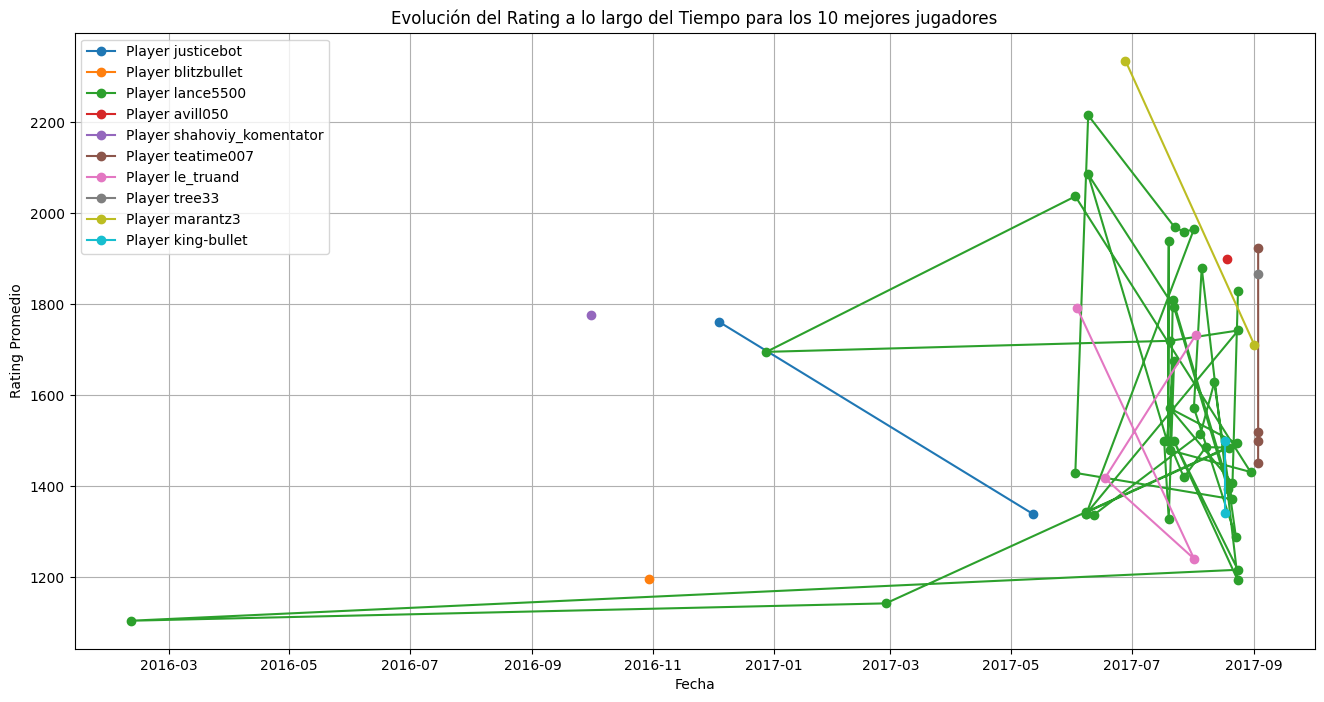

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

# Combine ratings for both white and black players, treating them as a single player
all_players = pd.concat([df[['white_id', 'white_rating', 'created_at']].rename(columns={'white_id': 'player_id', 'white_rating': 'rating'}),
                         df[['black_id', 'black_rating', 'created_at']].rename(columns={'black_id': 'player_id', 'black_rating': 'rating'})],
                        ignore_index=True)

# Calculate cumulative ratings for each player
all_players['cumulative_rating'] = all_players.groupby('player_id')['rating'].expanding().mean().reset_index(drop=True)

# Plot the evolution of ratings over time for each player
plt.figure(figsize=(16, 8))

# Limit the number of players to plot
top_players = all_players.groupby('player_id')['rating'].max().nlargest(10).index
for player_id in top_players:
    player_data = all_players[all_players['player_id'] == player_id]
    plt.plot(player_data['created_at'], player_data['cumulative_rating'], label=f'Player {player_id}', marker='o')

plt.title('Evolución del Rating a lo largo del Tiempo para los 10 mejores jugadores')
plt.xlabel('Fecha')
plt.ylabel('Rating Promedio')
plt.legend()
plt.grid(True)

plt.show()


## Evolución a lo largo del tiempo de los 10 mejores jugadores con más de 10 partidas

/tmp/ipykernel_14612/889821659.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_players['cumulative_rating'] = filtered_players.groupby('player_id')['rating'].expanding().mean().reset_index(drop=True)


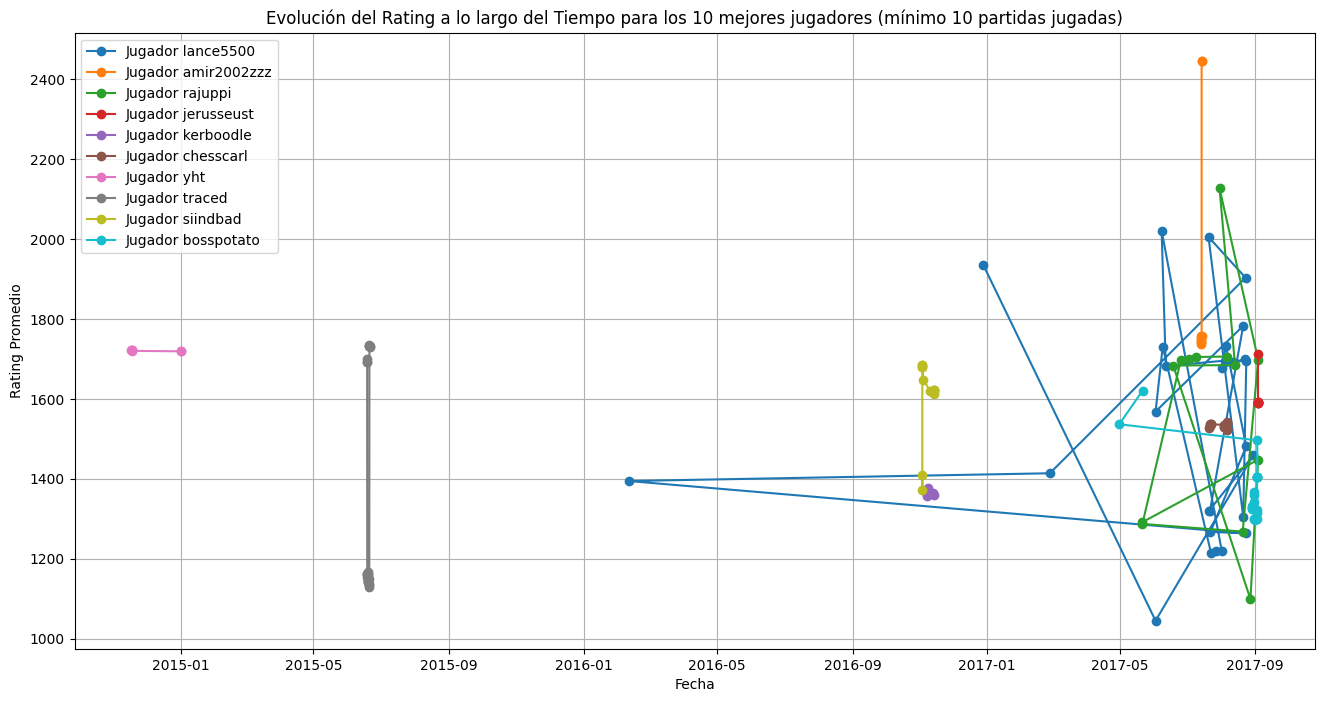

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir a tipo datetime
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

# Combina los ratings de jugadores blancos y negros
all_players = pd.concat([
    df[['white_id', 'white_rating', 'created_at']].rename(columns={'white_id': 'player_id', 'white_rating': 'rating'}),
    df[['black_id', 'black_rating', 'created_at']].rename(columns={'black_id': 'player_id', 'black_rating': 'rating'})
], ignore_index=True)

# Filtrar jugadores que hayan jugado al menos 10 partidas
player_counts = all_players['player_id'].value_counts()
qualified_players = player_counts[player_counts >= 10].index

filtered_players = all_players[all_players['player_id'].isin(qualified_players)]

# Calcular el rating acumulado para cada jugador
filtered_players['cumulative_rating'] = filtered_players.groupby('player_id')['rating'].expanding().mean().reset_index(drop=True)
plt.figure(figsize=(16, 8))

top_players = filtered_players.groupby('player_id')['rating'].max().nlargest(10).index
for player_id in top_players:
    player_data = filtered_players[filtered_players['player_id'] == player_id]
    plt.plot(player_data['created_at'], player_data['cumulative_rating'], label=f'Jugador {player_id}', marker='o')


# Personalizar la gráfica
plt.title('Evolución del Rating a lo largo del Tiempo para los 10 mejores jugadores (mínimo 10 partidas jugadas)')
plt.xlabel('Fecha')
plt.ylabel('Rating Promedio')
plt.legend()
plt.grid(True)
plt.show()




Jugador lance5500:
                 white_id           black_id                    created_at
904             lance5500        cookieblake 2017-08-23 20:26:40.000000000
4467            lance5500        stevenemily 2017-08-21 01:46:40.000000000
5373                burks          lance5500 2017-06-08 02:46:40.000000000
5374                burks          lance5500 2017-06-08 00:00:00.000000000
5424            lance5500           artem555 2017-07-20 14:13:20.000000000
5935            lance5500                ijh 2017-08-23 03:46:40.000000000
6040            lance5500         justindong 2017-02-26 17:26:40.000000000
6251            lance5500        saitama_opm 2016-02-10 21:33:20.000000000
11584           lance5500  thechessdetective 2017-08-23 18:47:09.547000064
11597     anonymous_enemy          lance5500 2017-08-19 02:38:09.328000000
11601     anonymous_enemy          lance5500 2017-08-07 13:55:25.856000000
11602           lance5500    anonymous_enemy 2017-07-22 08:08:33.550000128
11742

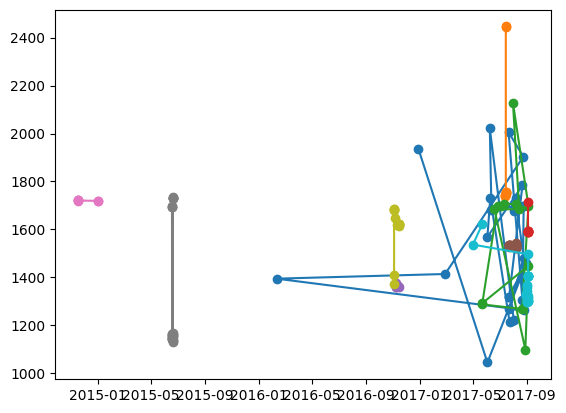

In [21]:
top_players = filtered_players.groupby('player_id')['rating'].max().nlargest(10).index
for player_id in top_players:
    player_data = filtered_players[filtered_players['player_id'] == player_id]
    plt.plot(player_data['created_at'], player_data['cumulative_rating'], label=f'Jugador {player_id}', marker='o')
    player_info = df[(df['white_id'] == player_id) | (df['black_id'] == player_id)][['white_id', 'black_id', 'created_at']]
    print(f"\nJugador {player_id}:")
    print(player_info)

### Evolución a lo largo del tiempo de los 10 jugadores con menos rating

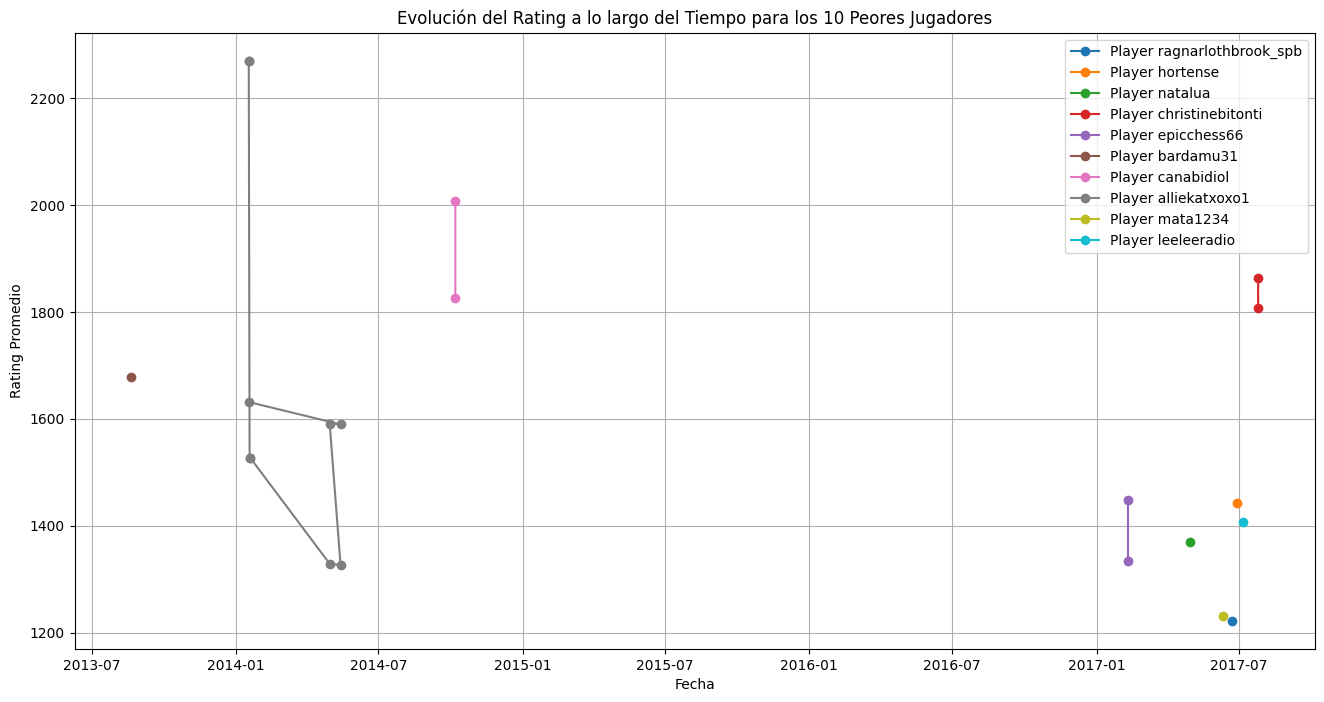

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

# Combine ratings for both white and black players, treating them as a single player
all_players = pd.concat([df[['white_id', 'white_rating', 'created_at']].rename(columns={'white_id': 'player_id', 'white_rating': 'rating'}),
                         df[['black_id', 'black_rating', 'created_at']].rename(columns={'black_id': 'player_id', 'black_rating': 'rating'})],
                        ignore_index=True)

# Calculate cumulative ratings for each player
all_players['cumulative_rating'] = all_players.groupby('player_id')['rating'].expanding().mean().reset_index(drop=True)

# Plot the evolution of ratings over time for the 10 players with the lowest ratings
plt.figure(figsize=(16, 8))
bottom_players = all_players.groupby('player_id')['rating'].last().nsmallest(10).index
for player_id in bottom_players:
    player_data = all_players[all_players['player_id'] == player_id]
    plt.plot(player_data['created_at'], player_data['cumulative_rating'], label=f'Player {player_id}', marker='o')

# Customize the plot
plt.title('Evolución del Rating a lo largo del Tiempo para los 10 Peores Jugadores')
plt.xlabel('Fecha')
plt.ylabel('Rating Promedio')
plt.legend()
plt.grid(True)
plt.show()

### Análisis del rating promedio a lo largo del tiempo para los jugadores que hayan jugado más de 10 partidas

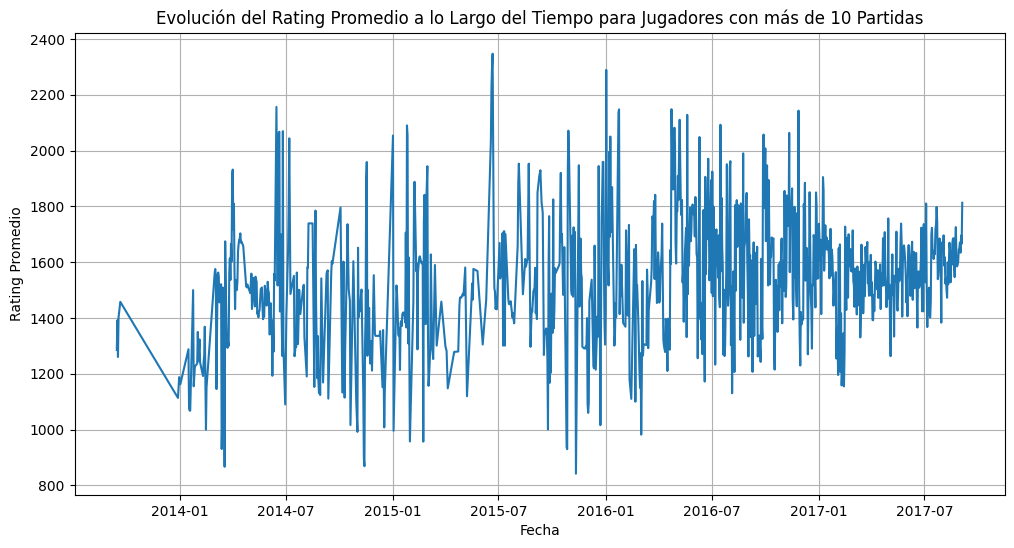

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Combina los ratings de jugadores blancos y negros
all_players = pd.concat([
    df[['white_id', 'white_rating', 'created_at']].rename(columns={'white_id': 'player_id', 'white_rating': 'rating'}),
    df[['black_id', 'black_rating', 'created_at']].rename(columns={'black_id': 'player_id', 'black_rating': 'rating'})
], ignore_index=True)

# Filtra los jugadores que hayan jugado más de 10 partidas
player_counts = all_players['player_id'].value_counts()
qualified_players = player_counts[player_counts > 10].index

filtered_players = all_players[all_players['player_id'].isin(qualified_players)]

# Calcula el rating promedio por fecha para los jugadores calificados
average_rating_per_date = filtered_players.groupby(filtered_players['created_at'].dt.date)['rating'].mean()
plt.figure(figsize=(12, 6))
average_rating_per_date.plot(kind='line')
plt.title('Evolución del Rating Promedio a lo Largo del Tiempo para Jugadores con más de 10 Partidas')
plt.xlabel('Fecha')
plt.ylabel('Rating Promedio')
plt.grid(True)
plt.show()


## Relación entre rating y resultados

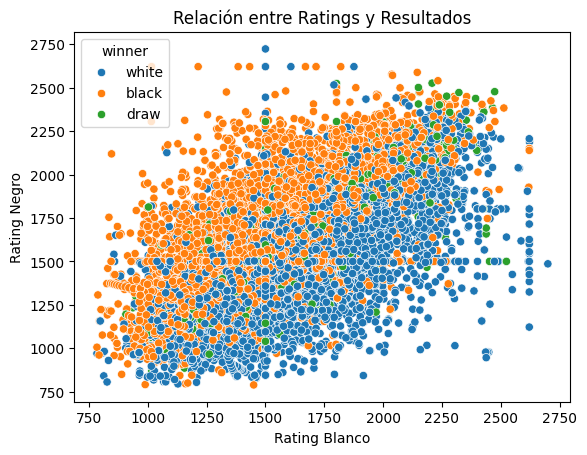

In [28]:
import seaborn as sns

# Diagrama de dispersión entre ratings y resultados
sns.scatterplot(x='white_rating', y='black_rating', hue='winner', data=df)
plt.title('Relación entre Ratings y Resultados')
plt.xlabel('Rating Blanco')
plt.ylabel('Rating Negro')
plt.show()

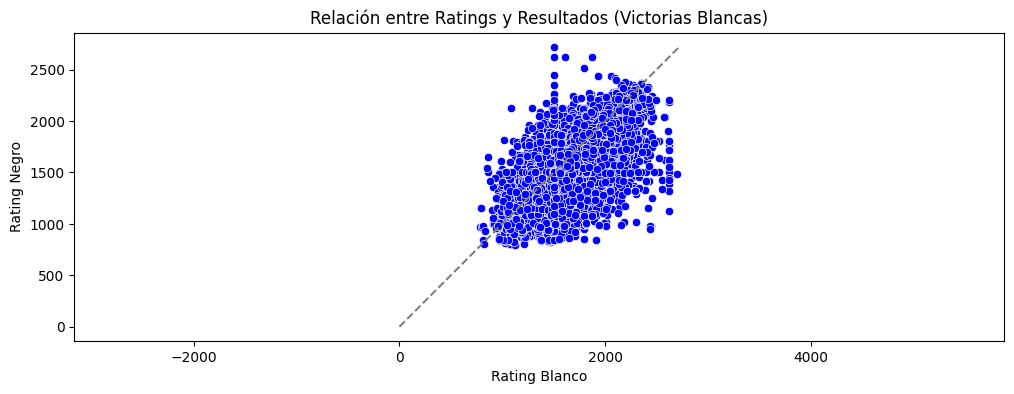

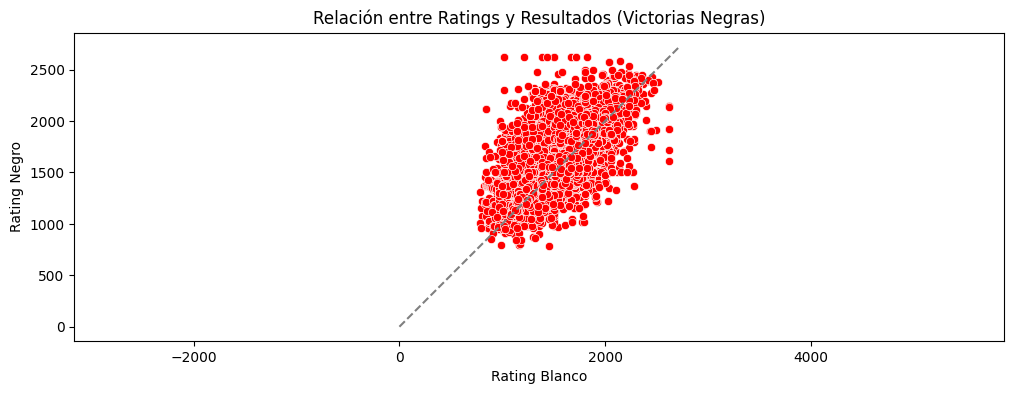

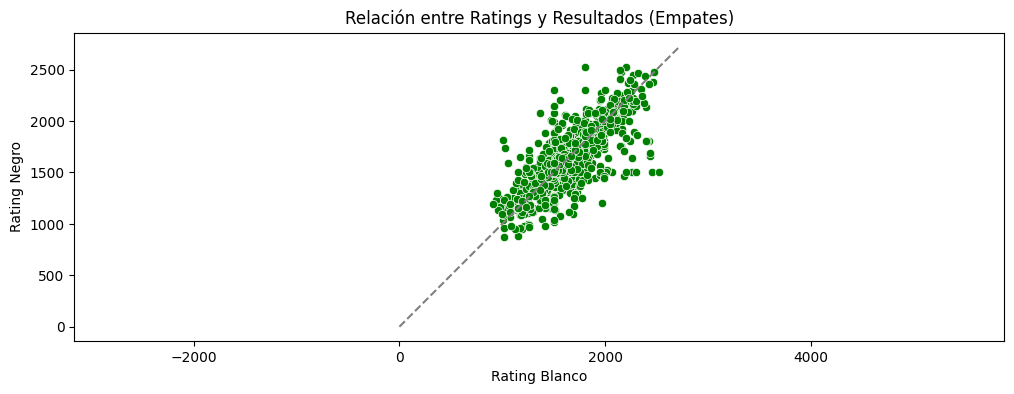

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/chess_data.csv')

df_white_win = df[df['winner'] == 'white']
df_black_win = df[df['winner'] == 'black']
df_draw = df[df['winner'] == 'draw']


x_limit = max(df['white_rating'].max(), df['black_rating'].max())
y_limit = max(df['white_rating'].max(), df['black_rating'].max())

plt.figure(figsize=(12, 4))
sns.scatterplot(x='white_rating', y='black_rating', data=df_white_win, color='blue')
plt.title('Relación entre Ratings y Resultados (Victorias Blancas)')
plt.xlabel('Rating Blanco')
plt.ylabel('Rating Negro')
plt.xlim(0, x_limit)
plt.ylim(0, y_limit)
plt.axis('equal')  


plt.plot([0, x_limit], [0, y_limit], color='gray', linestyle='--')

plt.show()

plt.figure(figsize=(12, 4))
sns.scatterplot(x='white_rating', y='black_rating', data=df_black_win, color='red')
plt.title('Relación entre Ratings y Resultados (Victorias Negras)')
plt.xlabel('Rating Blanco')
plt.ylabel('Rating Negro')
plt.xlim(0, x_limit)
plt.ylim(0, y_limit)
plt.axis('equal')  

plt.plot([0, x_limit], [0, y_limit], color='gray', linestyle='--')

plt.show()

plt.figure(figsize=(12, 4))
sns.scatterplot(x='white_rating', y='black_rating', data=df_draw, color='green')
plt.title('Relación entre Ratings y Resultados (Empates)')
plt.xlabel('Rating Blanco')
plt.ylabel('Rating Negro')
plt.xlim(0, x_limit)
plt.ylim(0, y_limit)
plt.axis('equal') 
plt.plot([0, x_limit], [0, y_limit], color='gray', linestyle='--')

plt.show()




## Relación entre rating y resultados, jugadores de más de 10 partidas

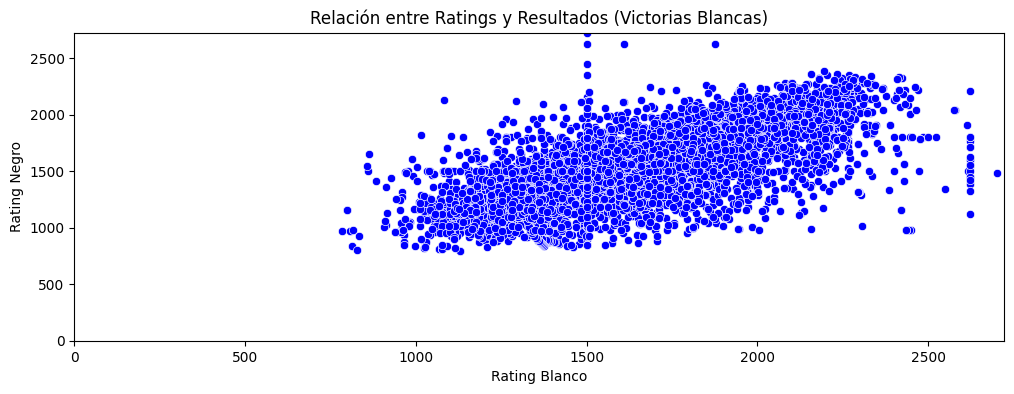

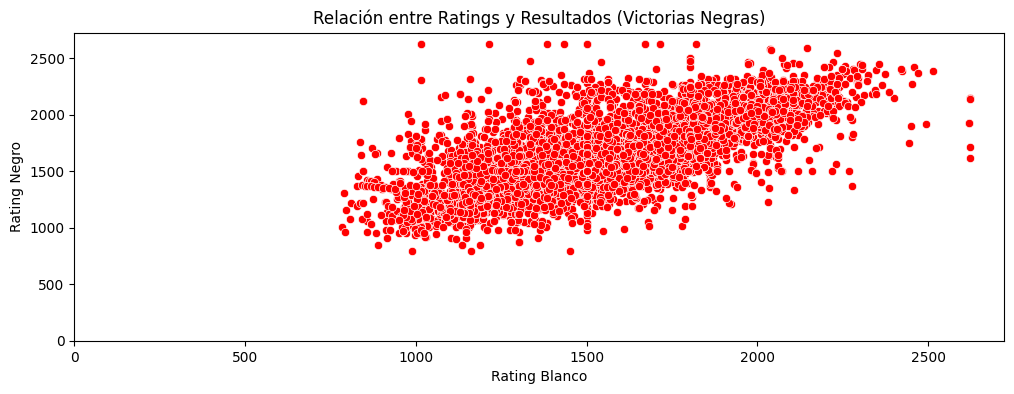

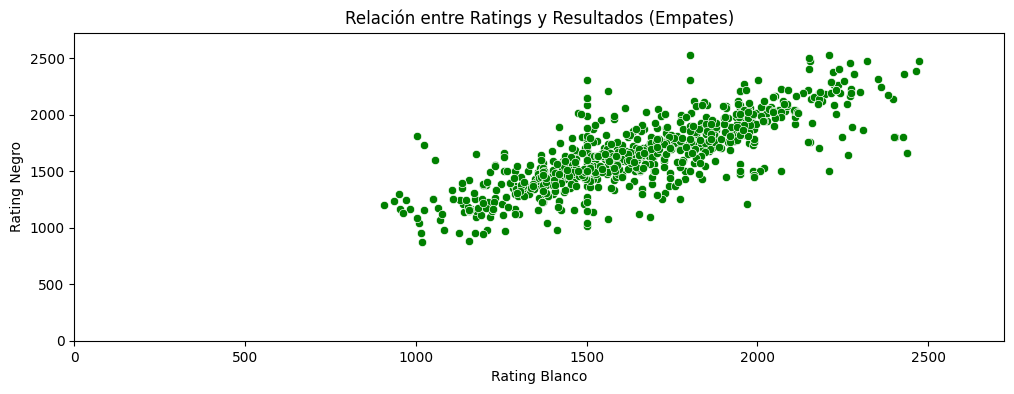

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular el número de partidas jugadas por cada jugador
games_played = df['white_id'].value_counts() + df['black_id'].value_counts()

# Filtrar jugadores que han jugado más de 10 partidas
players_over_10_games = games_played[games_played > 10].index

# Filtrar el DataFrame original
df_filtered = df[df['white_id'].isin(players_over_10_games) | df['black_id'].isin(players_over_10_games)]

df_white_win = df_filtered[df_filtered['winner'] == 'white']
df_black_win = df_filtered[df_filtered['winner'] == 'black']
df_draw = df_filtered[df_filtered['winner'] == 'draw']

# Definir los límites para los ejes x e y
x_limit = max(df_filtered['white_rating'].max(), df_filtered['black_rating'].max())
y_limit = max(df_filtered['white_rating'].max(), df_filtered['black_rating'].max())

# Diagrama de dispersión para victorias blancas
plt.figure(figsize=(12, 4))
sns.scatterplot(x='white_rating', y='black_rating', data=df_white_win, color='blue')
plt.title('Relación entre Ratings y Resultados (Victorias Blancas)')
plt.xlabel('Rating Blanco')
plt.ylabel('Rating Negro')
plt.xlim(0, x_limit)
plt.ylim(0, y_limit)
plt.show()

# Diagrama de dispersión para victorias negras
plt.figure(figsize=(12, 4))
sns.scatterplot(x='white_rating', y='black_rating', data=df_black_win, color='red')
plt.title('Relación entre Ratings y Resultados (Victorias Negras)')
plt.xlabel('Rating Blanco')
plt.ylabel('Rating Negro')
plt.xlim(0, x_limit)
plt.ylim(0, y_limit)
plt.show()

# Diagrama de dispersión para empates
plt.figure(figsize=(12, 4))
sns.scatterplot(x='white_rating', y='black_rating', data=df_draw, color='green')
plt.title('Relación entre Ratings y Resultados (Empates)')
plt.xlabel('Rating Blanco')
plt.ylabel('Rating Negro')
plt.xlim(0, x_limit)
plt.ylim(0, y_limit)
plt.show()


# Correlación entre el rating y el desempeño

In [6]:
import pandas as pd

jugadores = pd.unique(df[['white_id', 'black_id']].values.ravel('K'))

resultados = pd.DataFrame(columns=['jugador', 'partidas_ganadas', 'partidas_perdidas', 'rating_promedio'])

for jugador in jugadores:
   
    # Filtrar partidas en las que el jugador es blanco o negro
    partidas_jugador = df[(df['white_id'] == jugador) | (df['black_id'] == jugador)]
    if len(partidas_jugador) > 10:
        # Contar partidas ganadas y perdidas
        partidas_ganadas = partidas_jugador[partidas_jugador['winner'] == jugador].shape[0]
        partidas_perdidas = partidas_jugador[partidas_jugador['winner'] != jugador].shape[0]
        
        # Calcular el rating promedio
        ratings_blancos = partidas_jugador['white_rating'].loc[df['white_id'] == jugador]
        ratings_negros = partidas_jugador['black_rating'].loc[df['black_id'] == jugador]
        
        # Concatenar y calcular la media solo si hay ratings disponibles
        if not ratings_blancos.empty or not ratings_negros.empty:
            rating_promedio = pd.concat([ratings_blancos, ratings_negros]).mean()
        else:
            rating_promedio = None
        
        # Agregar resultados al DataFrame
        resultados = pd.concat([resultados, pd.DataFrame({
            'jugador': [jugador],
            'partidas_ganadas': [partidas_ganadas],
            'partidas_perdidas': [partidas_perdidas],
            'rating_promedio': [rating_promedio]
        })], ignore_index=True)

# Imprimir el DataFrame resultante
print(resultados)


/tmp/ipykernel_4028/444649365.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados = pd.concat([resultados, pd.DataFrame({


               jugador partidas_ganadas partidas_perdidas  rating_promedio
0    shivangithegenius                0                40      1025.600000
1              rajuppi                0                14      2442.642857
2             oldpaths                0                38      1557.973684
3              avelez8                0                14      1739.071429
4                 cdvh                0                23      1751.826087
..                 ...              ...               ...              ...
641              vares                0                28      1604.535714
642            zen3000                0                45      1500.000000
643        spiteknight                0                47      1653.234043
644            marstem                0                19      1867.684211
645           jamboger                0                27      1245.111111

[646 rows x 4 columns]


In [7]:
# Calcular la correlación entre el rating promedio y la cantidad de partidas ganadas
correlacion_rating_partidas_ganadas = resultados['rating_promedio'].corr(resultados['partidas_ganadas'])
print(f"Correlación entre rating promedio y partidas ganadas: {correlacion_rating_partidas_ganadas}")

# Calcular la correlación entre el rating promedio y la cantidad de partidas perdidas
correlacion_rating_partidas_perdidas = resultados['rating_promedio'].corr(resultados['partidas_perdidas'])
print(f"Correlación entre rating promedio y partidas perdidas: {correlacion_rating_partidas_perdidas}")


Correlación entre rating promedio y partidas ganadas: nan
Correlación entre rating promedio y partidas perdidas: -0.001264589718094075


/home/angela/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/angela/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


### Tendencias de los jugadores con más de 10 partidas

In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Cargar el conjunto de datos
df = pd.read_csv('data/chess_data.csv')

# Obtener todos los jugadores que hayan jugado más de 10 partidas
all_players = pd.concat([df['white_id'], df['black_id']]).value_counts()
players_over_10_games = all_players[all_players > 10].index

# Crear un DataFrame para almacenar las tendencias de rating de cada jugador
trends_data = pd.DataFrame(columns=['Player', 'Trend'])

# Iterar sobre cada jugador y calcular la tendencia
for player_id in players_over_10_games:
    player_df = df[(df['white_id'] == player_id) | (df['black_id'] == player_id)].sort_values(by='last_move_at')
    if len(player_df) > 10:
        # Calcular la media de los ratings para cada fecha
        grouped_df = player_df.groupby('last_move_at')[['white_rating', 'black_rating']].mean().reset_index()

        # Calcular la tendencia utilizando la media de los ratings
        X = pd.to_numeric(grouped_df['last_move_at']).values.reshape(-1, 1)
        # Calcular la media de 'white_rating' y 'black_rating', excluyendo valores nulos
        y = grouped_df[['white_rating', 'black_rating']].mean(axis=1, skipna=True).values

        # Asegurar que X y y tienen el mismo número de filas
        if len(X) == len(y):
            # Ahora X y y tienen el mismo número de filas
            model = LinearRegression().fit(X, y)
            slope = model.coef_[0]
            trend_row = pd.DataFrame({'Player': [player_id], 'Trend': [slope]})
            trends_data = pd.concat([trends_data, trend_row], ignore_index=True)
        else:
            print(f"Longitudes inconsistentes: {len(X)} en X y {len(y)} en y para el jugador {player_id}")

# Filtrar jugadores con tendencias positivas y negativas
positive_trends = trends_data[trends_data['Trend'] > 0]
negative_trends = trends_data[trends_data['Trend'] < 0]
static_trends = trends_data[trends_data['Trend'] == 0]
# Imprimir jugadores con tendencias positivas
print("Tendencias Positivas:")
print(positive_trends)
print(f"Número de jugadores con tendencias positivas: {len(positive_trends)}")

# Imprimir jugadores con tendencias negativas
print("\nTendencias Negativas:")
print(negative_trends)
print(f"Número de jugadores con tendencias negativas: {len(negative_trends)}")

# Imprimir jugadores con tendencias negativas
print("\nTendencias Estáticas:")
print(static_trends)
print(f"Número de jugadores con tendencias estáticas: {len(static_trends)}")



/tmp/ipykernel_40235/2835058108.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  trends_data = pd.concat([trends_data, trend_row], ignore_index=True)


Tendencias Positivas:
                 Player         Trend
1         a_p_t_e_m_u_u  4.035313e-08
2    vladimir-kramnik-1  7.249207e-08
7           chess-brahs  3.883270e-08
10        thegrim123321  9.134285e-08
14      fandm-lancaster  1.556057e-08
..                  ...           ...
639          dakotarain  3.918908e-08
640          stve400231  3.592435e-08
641          hannibal66  6.905944e-09
642       irispseudonym  1.825476e-10
644              khemar  6.354810e-11

[321 rows x 2 columns]
Número de jugadores con tendencias positivas: 321

Tendencias Negativas:
                 Player         Trend
0               taranga -7.608305e-08
3              king5891 -2.139890e-08
4               saviter -2.146758e-08
5            anakgreget -2.188667e-09
6          ducksandcats -2.599609e-08
..                  ...           ...
633  aleksander10032007 -3.415924e-09
636          marlon6109 -5.544530e-09
637     donutsaredelish -9.912419e-09
643              ytdvvc -9.293719e-09
645    

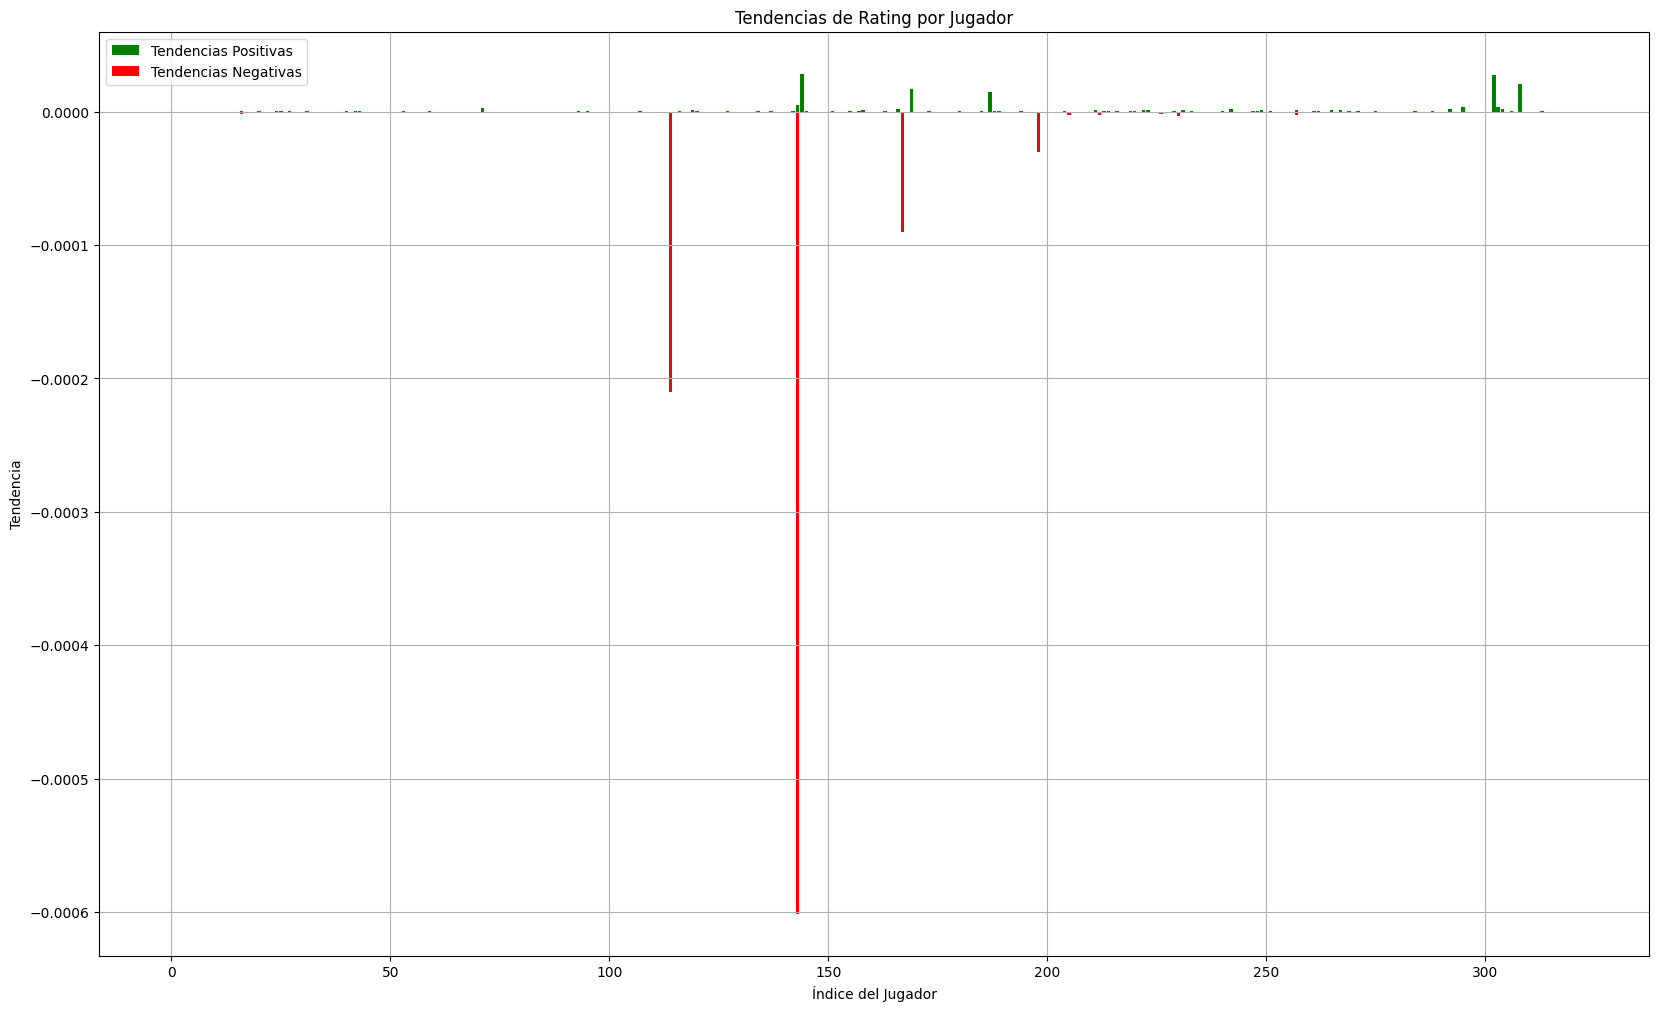

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))

player_indices_pos = range(len(positive_trends))
player_indices_neg = range(len(negative_trends))

plt.bar(player_indices_pos, positive_trends['Trend'], color='green', label='Tendencias Positivas')
plt.bar(player_indices_neg, negative_trends['Trend'], color='red', label='Tendencias Negativas')

plt.xlabel('Índice del Jugador')
plt.ylabel('Tendencia')
plt.title('Tendencias de Rating por Jugador')
plt.legend()
plt.grid(True)
plt.savefig("rating_jugador.png")
plt.show()


# Análisis temporales

### Análisis de la cantidad de partidas a lo largo del tiempo

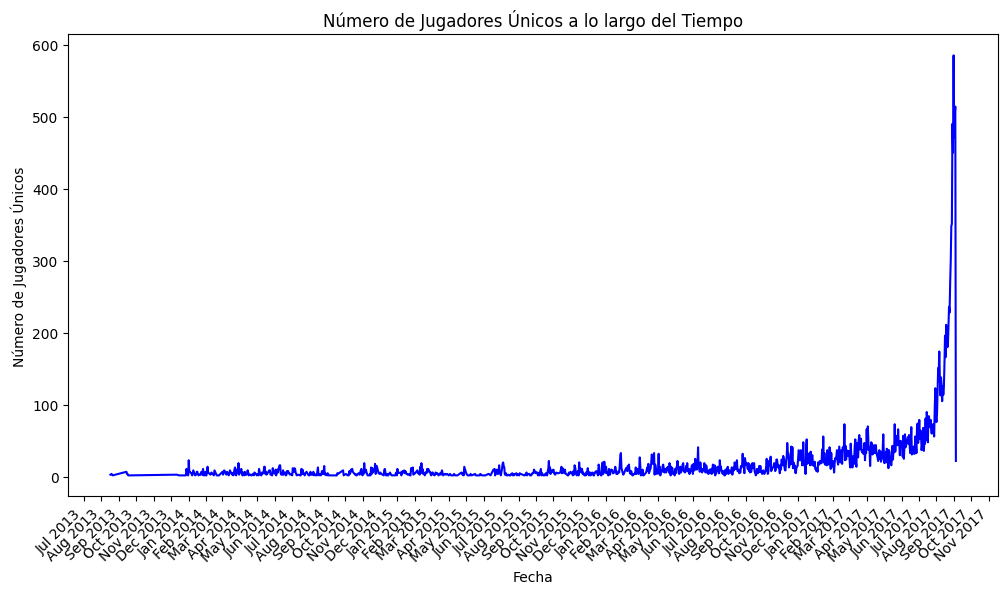

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Crear una columna 'jugadores' que contenga todos los jugadores únicos en cada partida
df['jugadores'] = df.apply(lambda row: set([row['white_id'], row['black_id']]), axis=1)

# Crear una columna 'fecha' a partir de 'created_at'
df['fecha'] = pd.to_datetime(df['created_at'], unit='ms').dt.date  # Extraer solo la fecha, no la hora

# Crear un df con las fechas y el número de jugadores únicos en cada fecha
jugadores_por_fecha = df.groupby('fecha')['jugadores'].apply(lambda x: len(set.union(*x)))

# Crear un gráfico de línea temporal
plt.figure(figsize=(12, 6))
sns.lineplot(x=jugadores_por_fecha.index, y=jugadores_por_fecha.values, color='b')

# Formatear el eje x para mostrar todos los meses
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.title('Número de Jugadores Únicos a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Jugadores Únicos')
plt.xticks(rotation=45, ha='right') 
plt.show()


### Nº de jugadores a lo largo del tiempo

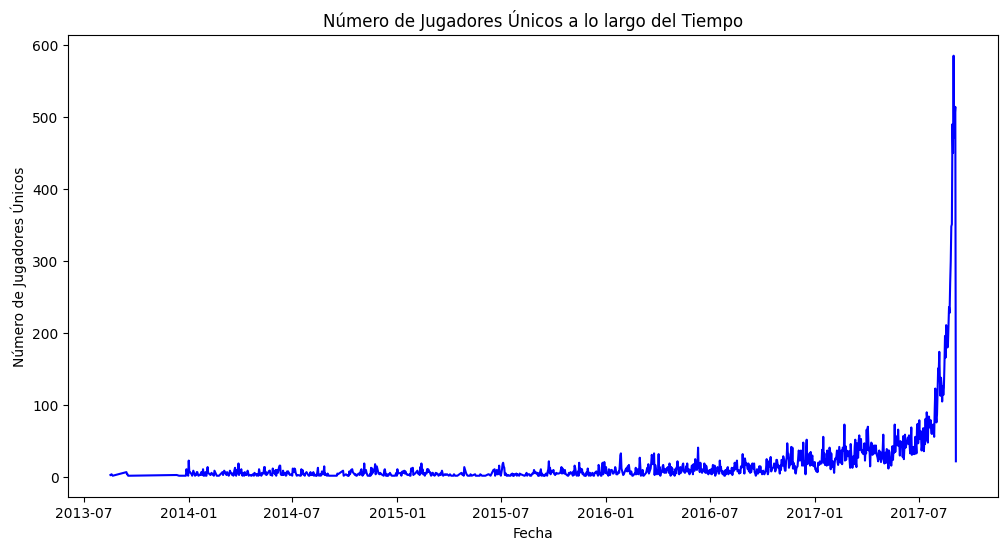

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['jugadores'] = df.apply(lambda row: set([row['white_id'], row['black_id']]), axis=1)

# Crear una columna 'fecha' a partir de 'created_at'
df['fecha'] = pd.to_datetime(df['created_at'], unit='ms').dt.date  # Extraer solo la fecha, no la hora

# Crear un df con las fechas y el número de jugadores únicos en cada fecha
jugadores_por_fecha = df.groupby('fecha')['jugadores'].apply(lambda x: len(set.union(*x)))

plt.figure(figsize=(12, 6))
sns.lineplot(x=jugadores_por_fecha.index, y=jugadores_por_fecha.values, color='b')
plt.title('Número de Jugadores Únicos a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Jugadores Únicos')
plt.show()


### Análisis de las aperturas más populares a lo largo del tiempo 

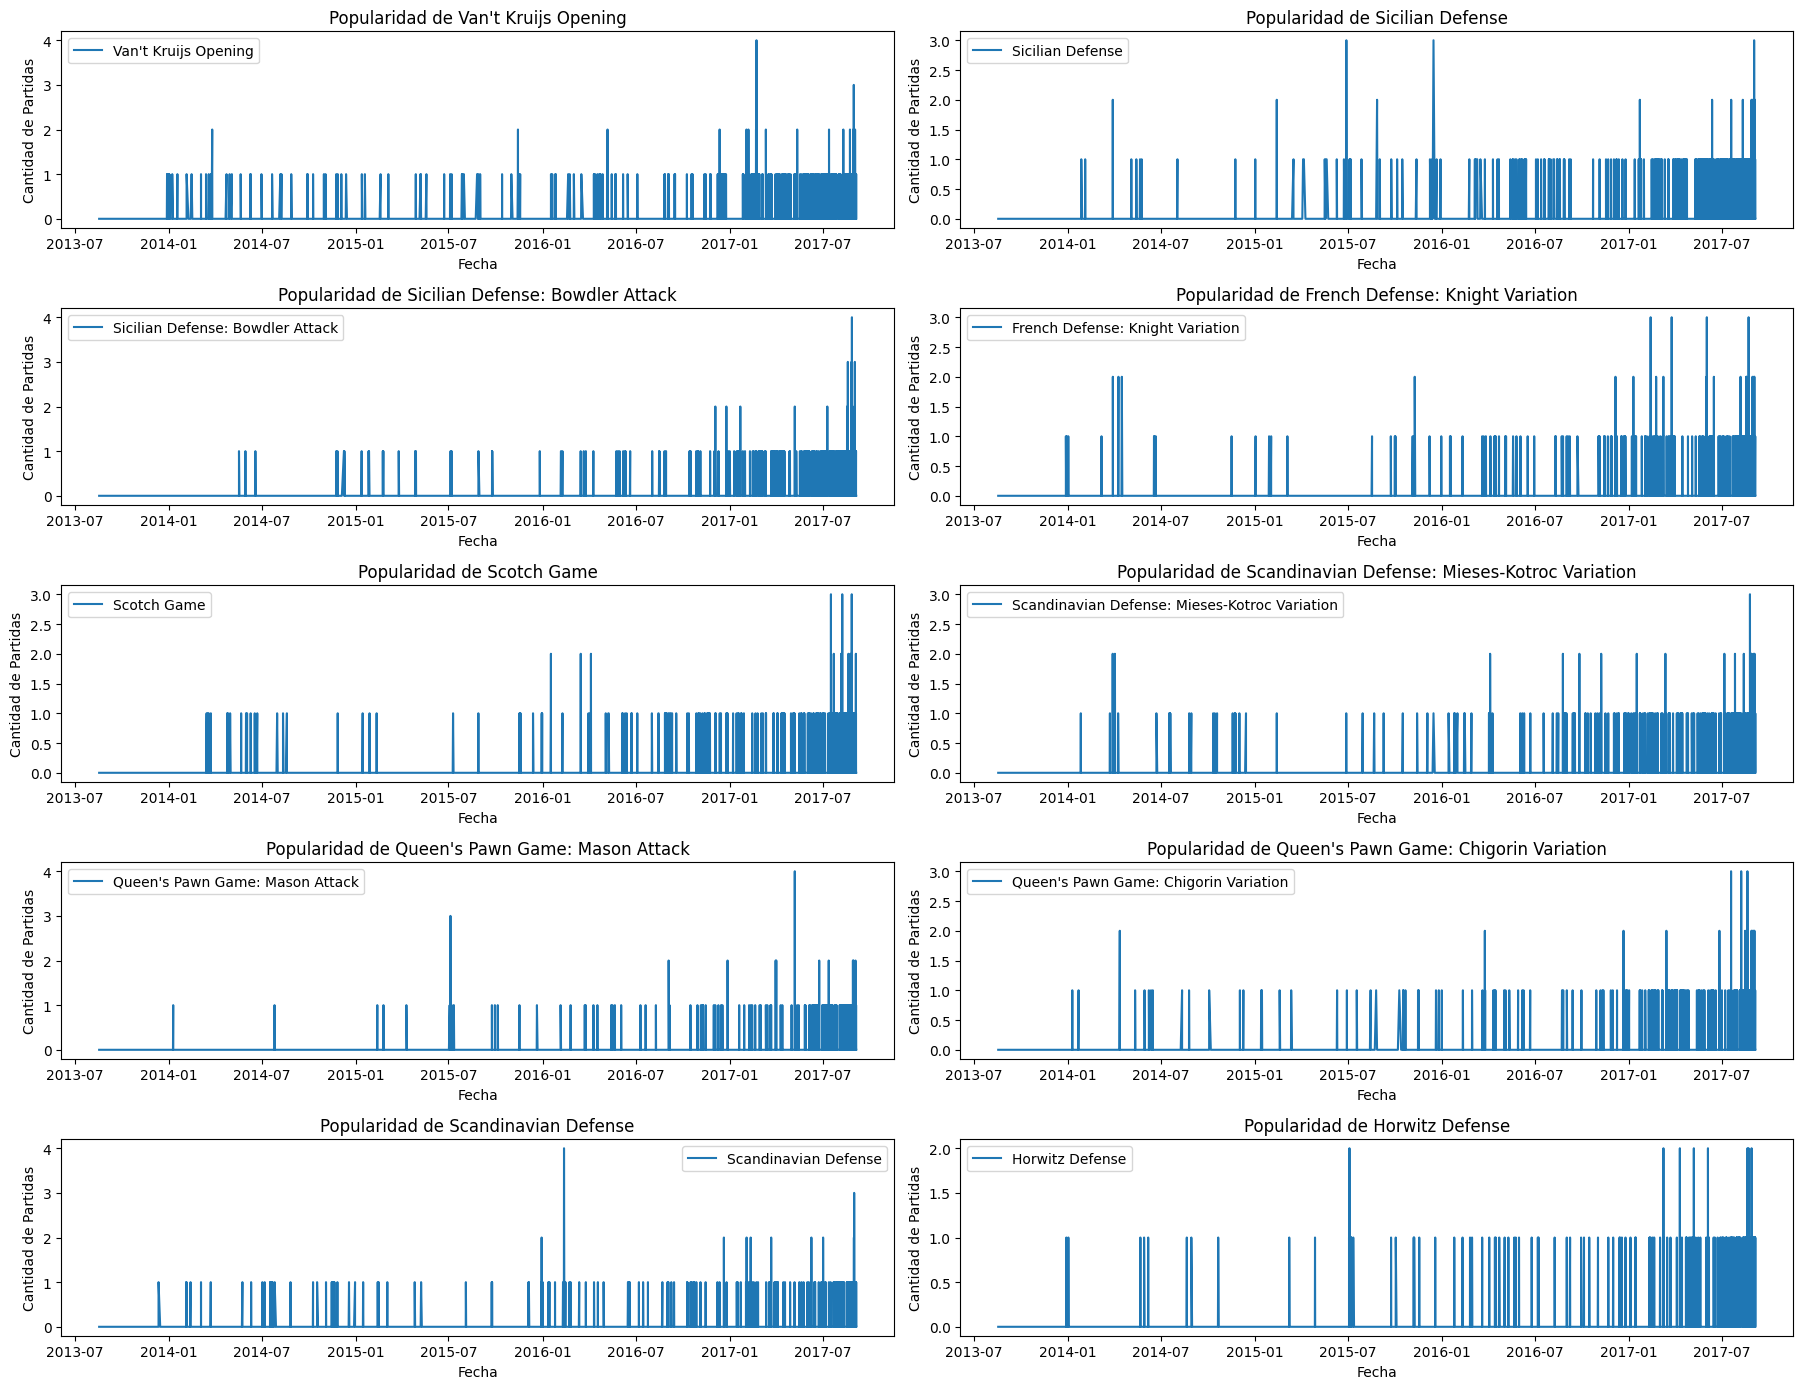

In [26]:

df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

popular_openings_per_date = df.groupby(['created_at', 'opening_name']).size().unstack().fillna(0)

# Seleccionar las 10 aperturas más populares
top_openings = popular_openings_per_date.sum().nlargest(10).index

# df solo las aperturas más populares
filtered_openings = popular_openings_per_date[top_openings]
plt.figure(figsize=(18, 14))

for i, opening in enumerate(filtered_openings.columns, 1):
    plt.subplot(5, 2, i)
    plt.plot(filtered_openings.index, filtered_openings[opening], label=opening)
    plt.title(f'Popularidad de {opening}')
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad de Partidas')
    plt.legend()

plt.tight_layout()
plt.show()


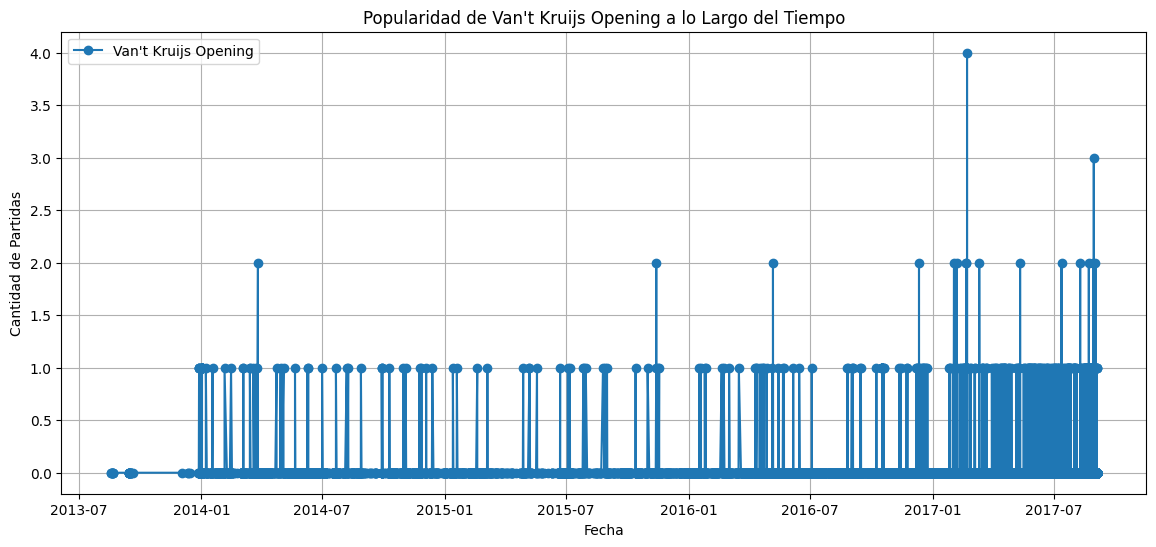

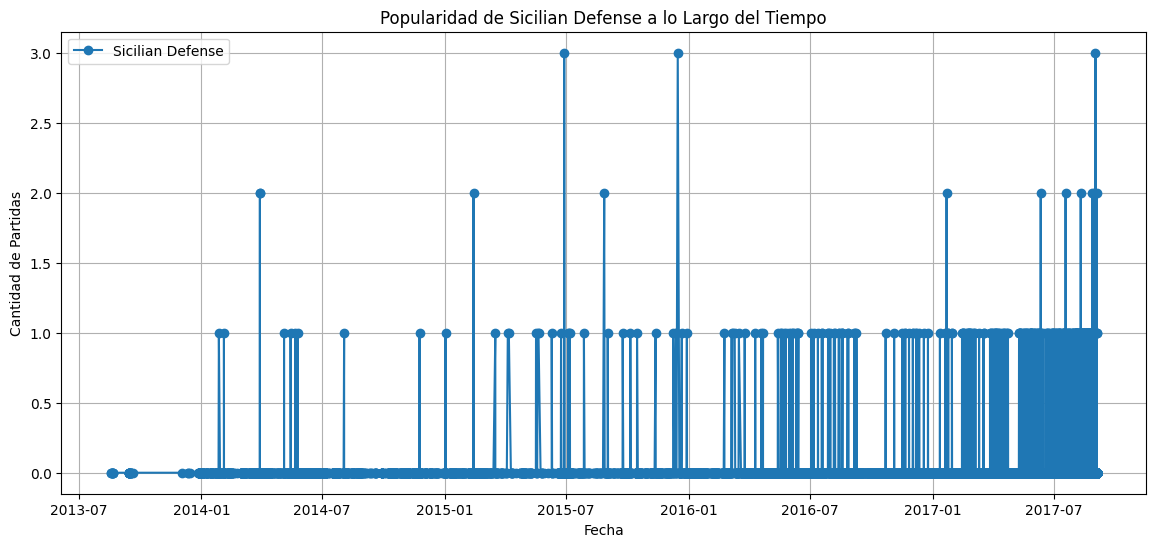

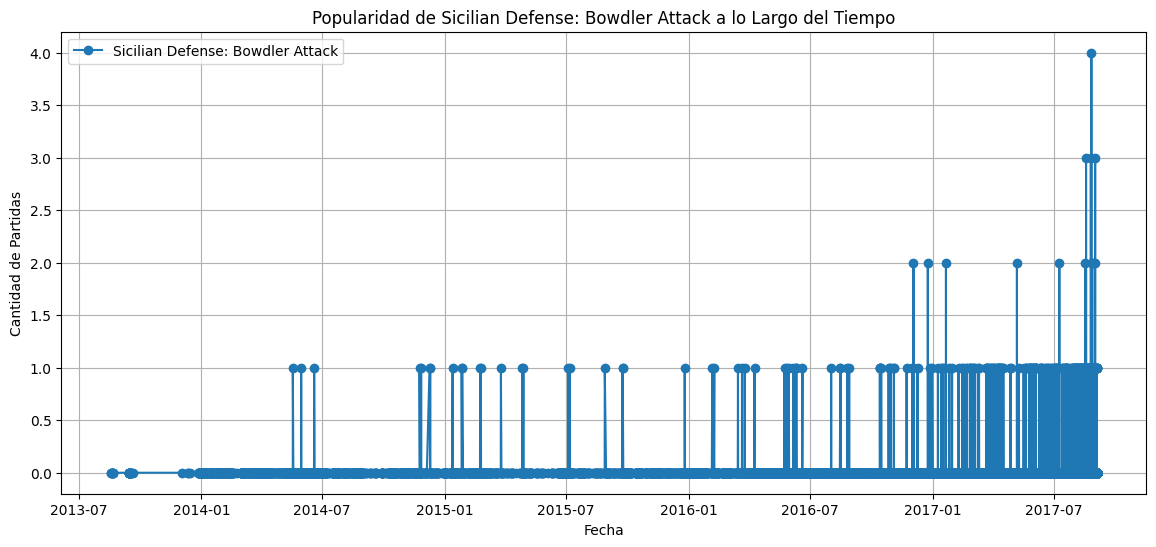

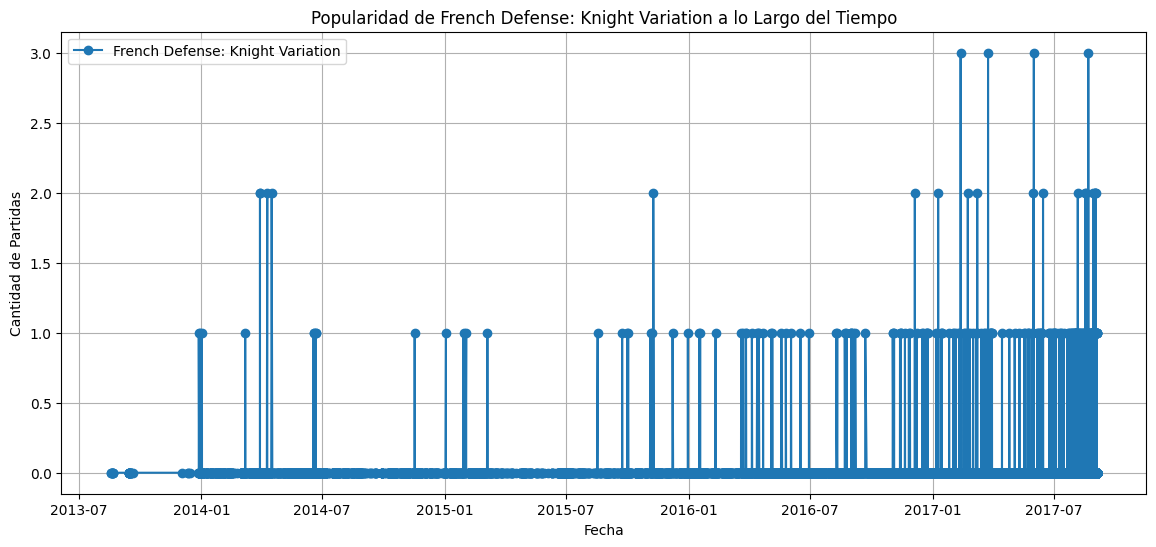

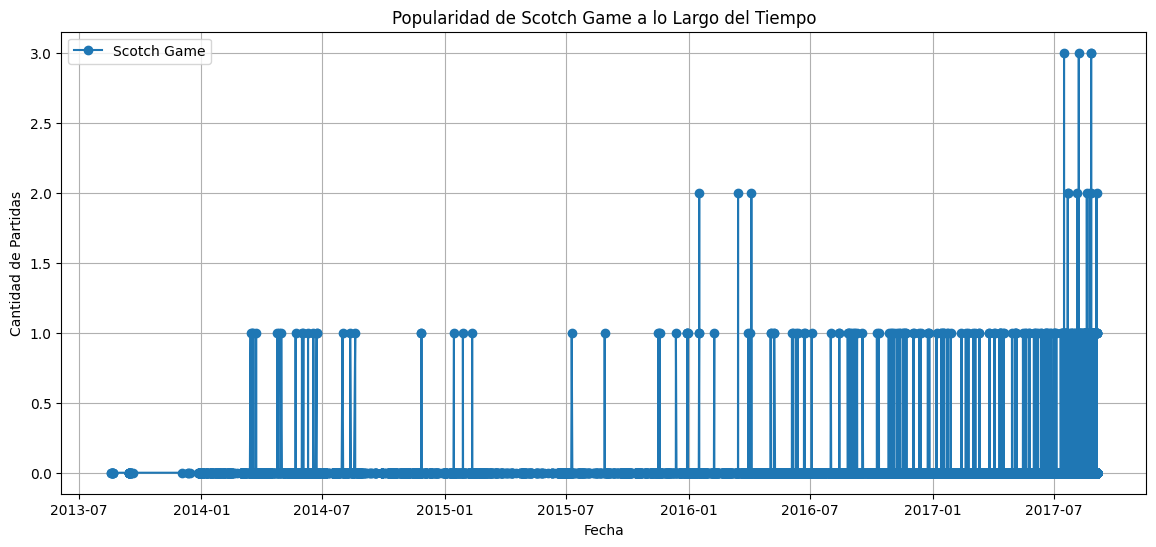

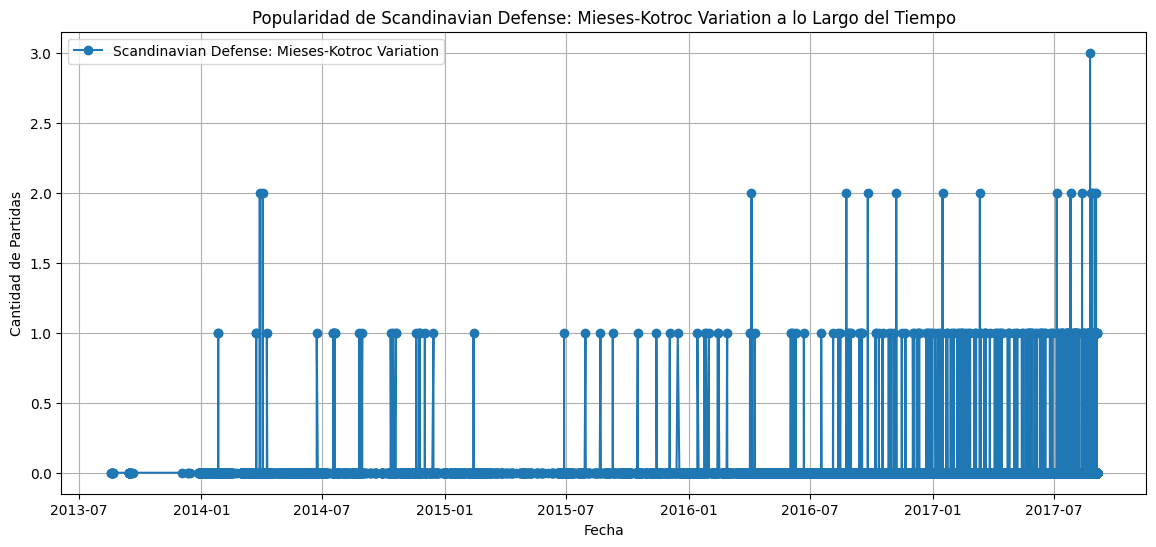

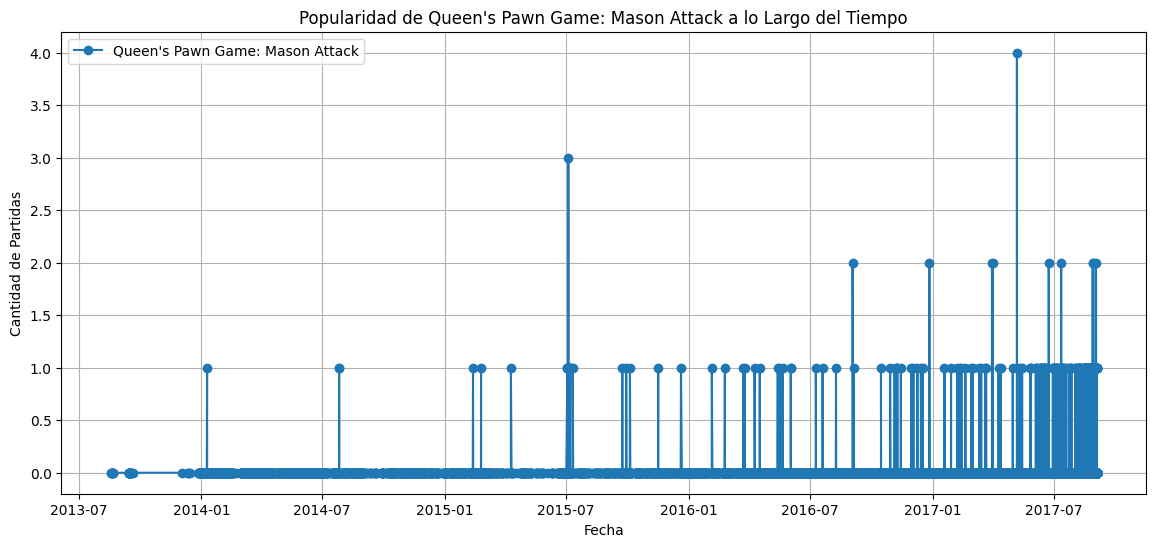

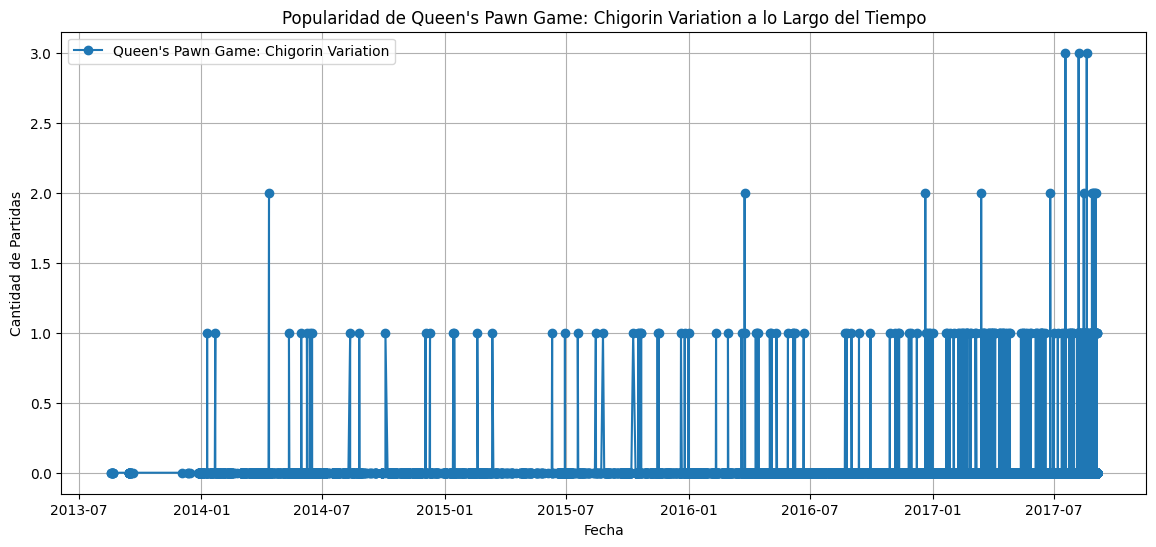

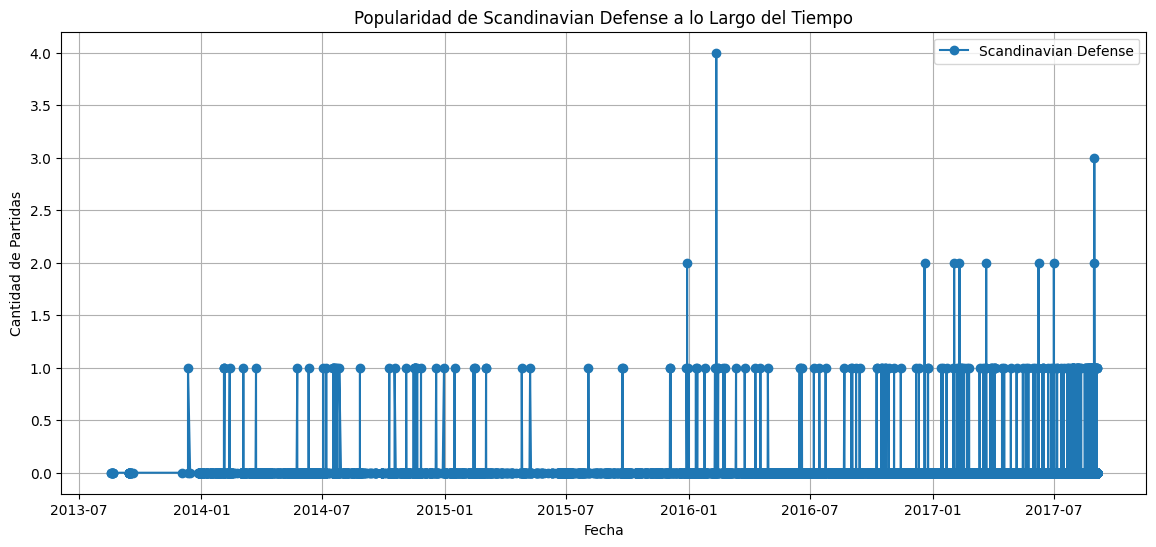

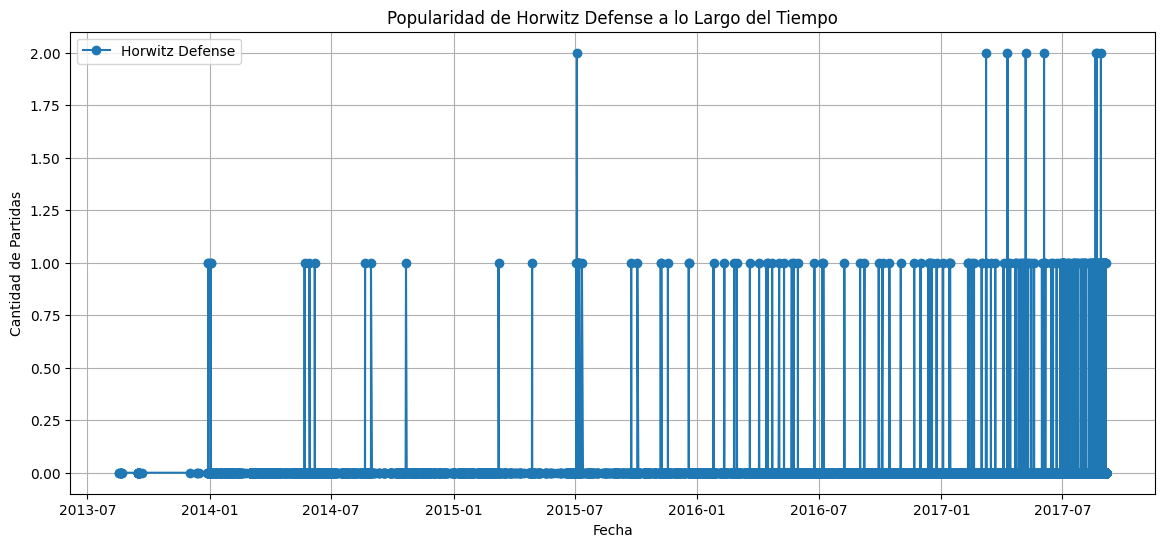

In [27]:
# Graficar la popularidad de cada apertura a lo largo del tiempo en gráficos individuales
for opening in filtered_openings.columns:
    plt.figure(figsize=(14, 6))
    plt.plot(filtered_openings.index, filtered_openings[opening], label=opening, marker='o')
    plt.title(f'Popularidad de {opening} a lo Largo del Tiempo')
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad de Partidas')
    plt.legend()
    plt.grid(True)
    plt.show()



## Análisis de victorias según el tiempo de partida
Analizar la relación entre el tipo de victoria y el tiempo utilizado por partida.

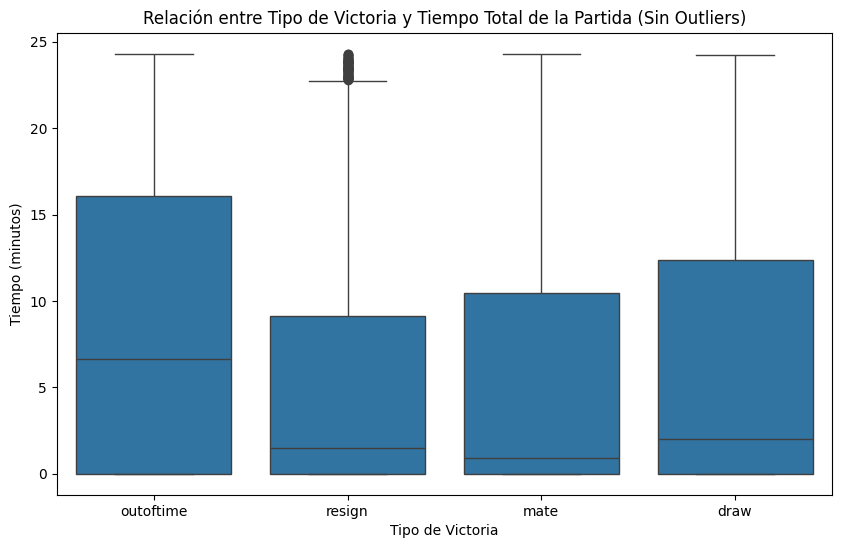

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data/chess_data.csv')
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')
df['last_move_at'] = pd.to_datetime(df['last_move_at'], unit='ms')

# Calcular la diferencia en tiempo total de la partida en minutos
df['total_time_minutes'] = (df['last_move_at'] - df['created_at']).dt.total_seconds() / 60

# Definir los percentiles para determinar el rango de datos a incluir
percentiles = [0.1, 0.25, 0.5, 0.75, 0.9]
range_values = df['total_time_minutes'].quantile(percentiles).values

# Filtrar los datos dentro del rango definido (eliminar outliers excesivos, solo selecciona los que caen entre 10 y 90)
df_filtered = df[df['total_time_minutes'].between(range_values[0], range_values[-1])]

# Diagrama de caja de la diferencia en tiempo por tipo de victoria sin outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='victory_status', y='total_time_minutes', data=df_filtered)
plt.title('Relación entre Tipo de Victoria y Tiempo Total de la Partida (Sin Outliers)')
plt.xlabel('Tipo de Victoria')
plt.ylabel('Tiempo (minutos)')
plt.show()

# Análisis de estrategias ganadoras

## Análisis de distribución de aperturas por resultados

Verificar si ciertas aperturas están asociadas con resultados específicos. De las 10 más comunes vemos cómo se distribuyen.

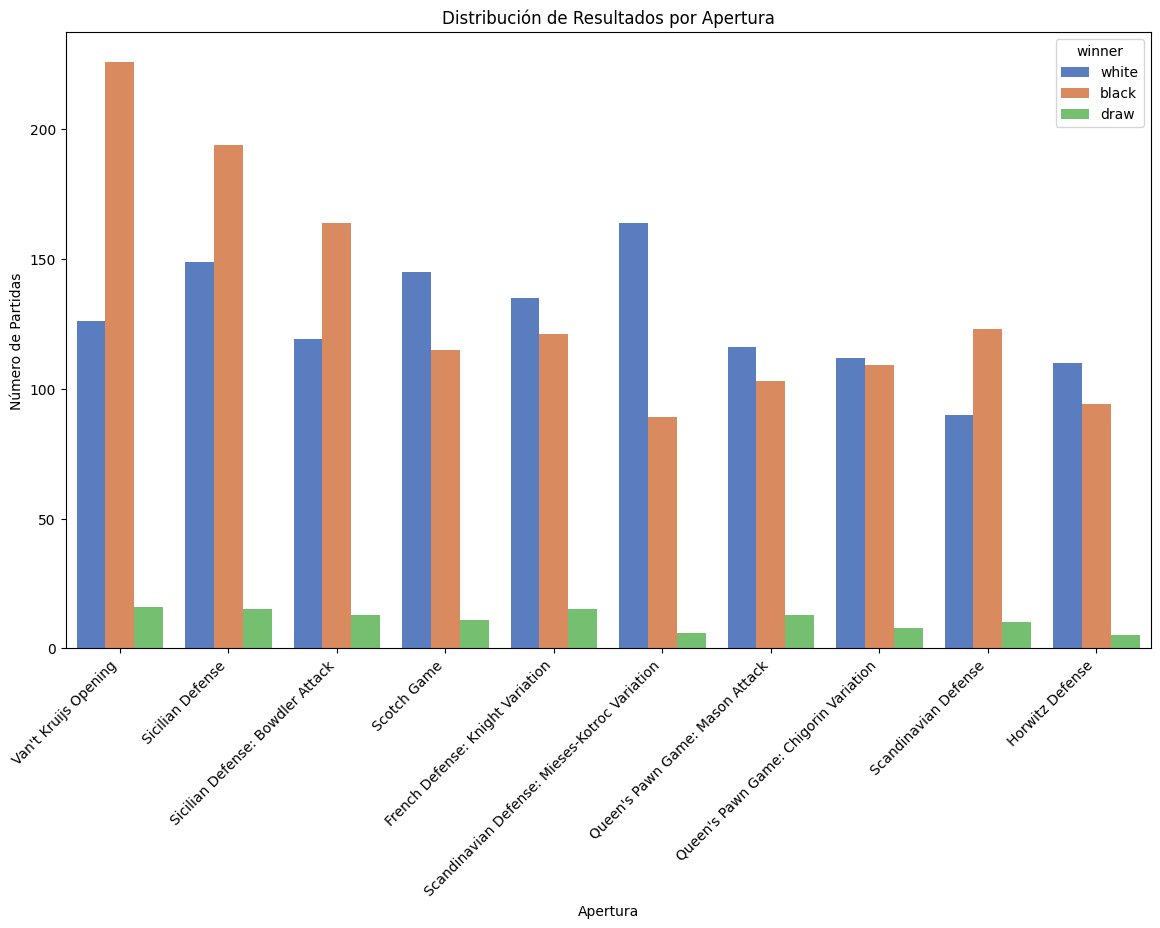

In [30]:
# Diagrama de barras apertura vs resultado
plt.figure(figsize=(14, 8))
sns.countplot(x='opening_name', hue='winner', data=df, order=df['opening_name'].value_counts().iloc[:10].index, palette='muted')
plt.title('Distribución de Resultados por Apertura')
plt.xlabel('Apertura')
plt.ylabel('Número de Partidas')
plt.xticks(rotation=45, ha='right')
plt.show()


## Análisis de movimientos exitosos y erróneos

In [40]:
def algebraic_to_uci(board, move_alg):
    # Convierte notación algebraica a notación UCI
    move = chess.Move.from_uci(board.parse_san(move_alg))
    return move


In [1]:
import chess
import chess.engine
import chess.pgn
import io

def evaluate_moves(game_moves):
    index = 0
    # Create a file-like object from the algebraic notation string
    pgn_string_io = io.StringIO(game_moves)

    # Load the game from the file-like object
    game = chess.pgn.read_game(pgn_string_io)
    board = chess.Board()
    engine = chess.engine.SimpleEngine.popen_uci("/usr/games/stockfish")  
    algebraic_moves = game_moves.split()

    for move in game.mainline_moves():
        turn = "Blancas" if board.turn == chess.WHITE else "Negras"
        
        info = engine.analyse(board, chess.engine.Limit(time=0.1))
        evaluation = info["score"].relative.score()

        improvement = "Mejora" if (evaluation > 0 and board.turn == chess.WHITE) or (evaluation < 0 and board.turn == chess.BLACK) else "Empeora"

        print(f"{turn} - {algebraic_moves[index]}: {improvement} la posición ({evaluation})")
        board.push(move)
        index += 1

    engine.quit()

game_moves = "d4 d5 c4 dxc4 e4 b5 a4 c6 axb5 cxb5 b3 Ba6 bxc4 bxc4 Qf3 Qxd4 Be3 Qxa1 Ne2 Qxb1+ Nc1"
evaluate_moves(game_moves)


Blancas - d4: Mejora la posición (34)
Negras - d5: Mejora la posición (-33)
Blancas - c4: Mejora la posición (45)
Negras - dxc4: Mejora la posición (-38)
Blancas - e4: Mejora la posición (28)
Negras - b5: Mejora la posición (-53)
Blancas - a4: Mejora la posición (85)
Negras - c6: Mejora la posición (-74)
Blancas - axb5: Mejora la posición (98)
Negras - cxb5: Mejora la posición (-99)
Blancas - b3: Mejora la posición (86)
Negras - Ba6: Empeora la posición (0)
Blancas - bxc4: Mejora la posición (173)
Negras - bxc4: Mejora la posición (-177)
Blancas - Qf3: Mejora la posición (325)
Negras - Qxd4: Empeora la posición (59)
Blancas - Be3: Empeora la posición (-82)
Negras - Qxa1: Empeora la posición (1010)
Blancas - Ne2: Empeora la posición (-923)
Negras - Qxb1+: Empeora la posición (1283)
Blancas - Nc1: Empeora la posición (-1307)


## Identificación de movimientos ganadores	

In [7]:
import chess
import chess.engine
import chess.pgn
import io

def evaluate_moves(game_moves):
    # Create a file-like object from the algebraic notation string
    pgn_string_io = io.StringIO(game_moves)

    # Load the game from the file-like object
    game = chess.pgn.read_game(pgn_string_io)
    board = chess.Board()
    engine = chess.engine.SimpleEngine.popen_uci("/usr/games/stockfish")

    for move in game.mainline_moves():
        # Verifica el color del jugador
        player_color = "Blancas" if board.turn == chess.WHITE else "Negras"

        board.push(move)
        info = engine.analyse(board, chess.engine.Limit(time=0.1))
        evaluation = info["score"].relative.score()

        if (player_color == "Blancas" and evaluation > 100) or (player_color == "Negras" and evaluation < -100):
            print(f"{player_color} - {move}: Buena jugada ({evaluation})")
        elif (player_color == "Blancas" and evaluation < 0) or (player_color == "Negras" and evaluation > 0 ):
            print(f"{player_color} - {move}: Favorece al oponente ({evaluation})")
        else:
            print(f"{player_color} - {move}: No hay cambios significativos en la posición: {evaluation}")

    engine.quit()

# Ejemplo de uso:
game_moves = "a3 d5 Ra2 e6 h3 Nf6 Rh2 Bd6 e3 Bxh2 Qh5 Nxh5"
evaluate_moves(game_moves)



Blancas - a2a3: No hay cambios significativos en la posición: 6
Negras - d7d5: No hay cambios significativos en la posición: -2
Blancas - a1a2: Buena jugada (146)
Negras - e7e6: No hay cambios significativos en la posición: -47
Blancas - h2h3: No hay cambios significativos en la posición: 85
Negras - g8f6: No hay cambios significativos en la posición: -90
Blancas - h1h2: Buena jugada (218)
Negras - f8d6: Buena jugada (-209)
Blancas - e2e3: Buena jugada (838)
Negras - d6h2: Buena jugada (-875)
Blancas - d1h5: Buena jugada (1784)
Negras - f6h5: Buena jugada (-1792)


## Análisis de notación algebraica

In [2]:
import pandas as pd

data = pd.read_csv('data/chess_data.csv')
sample_game = data['moves'].iloc[8]
moves = sample_game.split()

print("Movimientos de la primera partida:")
print(moves)

#Identificación de jugadas blave
print("\nJugadas Clave:")
for move in moves:
    if 'x' in move:  # Movimiento de captura
        print(f"Captura: {move}")
    elif '+' in move:  # Movimiento de jaque
        print(f"Jaque: {move}")

#Patrones Tácticos
print("\nPatrones Tácticos:")
for i in range(len(moves) - 1):
    current_move = moves[i]
    next_move = moves[i + 1]

    # Patrón: Clavada
    if 'B' in current_move and 'x' in next_move:
        print(f"Clavada de alfil: {current_move} - {next_move}")

    # Patrón: Horquilla
    if 'N' in current_move and 'x' in next_move:
        print(f"Horquilla de caballo: {current_move} - {next_move}")

    # Patrón: Doble Ataque
    if 'Q' in current_move and 'x' in next_move:
        print(f"Doble ataque de reina: {current_move} - {next_move}")

    # Patrón: Desviación
    if current_move[0] in ('R', 'B', 'Q') and 'x' in next_move:
        print(f"Desviación de {current_move[0]}: {current_move} - {next_move}")

    # Patrón: Intercepción
    if 'P' in current_move and 'x' in next_move:
        print(f"Intercepción de peón: {current_move} - {next_move}")

    # Patrón: Sacrificio
    if 'x' in current_move and '+' in next_move:
        print(f"Sacrificio seguido de jaque: {current_move} - {next_move}")

    # Patrón: Mate
    if '#' in next_move:
        print(f"Mate: {current_move} - {next_move}")

    # Patrón: Enroque
    if current_move in ('O-O', 'O-O-O'):
        print(f"Enroque: {current_move}")

    # Patrón: Zugzwang
    if 'e.p.' in next_move:
        print(f"Zugzwang (Movimiento obligado): {current_move} - {next_move}")

    # Patrón: Ataque Descubierto
    if 'O-O' in current_move and '+' in next_move:
        print(f"Ataque descubierto tras enroque: {current_move} - {next_move}")

    # Patrón: Desenroque
    if current_move in ('e8=Q+', 'O-O-O+'):
        print(f"Desenroque: {current_move}")

    # Patrón: Ahogado
    if '1/2' in next_move:
        print(f"Ahogado (Empate por falta de movimientos): {current_move} - {next_move}")

Movimientos de la primera partida:
['e4', 'e5', 'Bc4', 'Nc6', 'Nf3', 'Nd4', 'd3', 'Nxf3+', 'Qxf3', 'Nf6', 'h3', 'Bc5', 'a3', 'O-O', 'Be3', 'Bxe3', 'Qxe3', 'Re8', 'Qf3', 'c6', 'Nc3', 'b5', 'Bb3', 'Qa5', 'O-O', 'Bb7', 'Ne2', 'c5', 'Rfd1', 'd6', 'c4', 'bxc4', 'dxc4', 'Rac8', 'Rd5', 'Bxd5', 'exd5', 'Qb6', 'Nc1', 'e4', 'Qf4', 'Nh5', 'Qg4', 'Nf6', 'Qf4', 'Qa5', 'Bc2', 'Qe1+', 'Kh2', 'Nh5', 'Qxd6', 'Qxf2', 'Bxe4', 'Rxe4', 'Nd3', 'Qg3+', 'Kg1', 'Qxd3', 'Rf1', 'Rce8', 'Qd7', 'Qe3+', 'Kh1', 'Ng3+', 'Kh2', 'Nxf1+']

Jugadas Clave:
Captura: Nxf3+
Captura: Qxf3
Captura: Bxe3
Captura: Qxe3
Captura: bxc4
Captura: dxc4
Captura: Bxd5
Captura: exd5
Jaque: Qe1+
Captura: Qxd6
Captura: Qxf2
Captura: Bxe4
Captura: Rxe4
Jaque: Qg3+
Captura: Qxd3
Jaque: Qe3+
Jaque: Ng3+
Captura: Nxf1+

Patrones Tácticos:
Horquilla de caballo: Nxf3+ - Qxf3
Enroque: O-O
Clavada de alfil: Be3 - Bxe3
Desviación de B: Be3 - Bxe3
Clavada de alfil: Bxe3 - Qxe3
Desviación de B: Bxe3 - Qxe3
Enroque: O-O
Desviación de R: Rd5 - Bxd5
Cla

## Análisis movimientos inusuales

In [3]:
import pandas as pd
from collections import Counter


data = pd.read_csv('data/chess_data.csv')

all_moves = ' '.join(data['moves']).split()


# Contar la frecuencia de cada movimiento
move_counter = Counter(all_moves)

umbral = 5  
#  movimientos inusuales
unusual_moves = [move for move, count in move_counter.items() if count <= umbral]

print("Movimientos inusuales:", unusual_moves)

Movimientos inusuales: ['Bd1#', 'Ndxf7', 'Ncxe7', 'Rbd4', 'Nge4+', 'Nxe7#', 'Nbc4', 'Nxc7#', 'h4#', 'Rfg6', 'Rexb7', 'Rgb2', 'Bf8#', 'Rah2', 'R1h3', 'Rexe6+', 'R8e3+', 'Rxd3#', 'e8=R#', 'R8e2+', 'Qhxg4', 'Na8+', 'Rfxh2+', 'Rag1+', 'f3#', 'Bxc5#', 'Rba4', 'Rab4', 'Rcb4', 'Ra4#', 'R8f2+', 'Nf4#', 'Q1a2#', 'Ne3#', 'Rcxd8', 'Rgd5', 'R8e4', 'R4d5', 'Ke7+', 'Ngh5', 'R1b2', 'Qec2', 'Qab3+', 'c8=N+', 'Rcxd1', 'Nba3', 'Nbd6+', 'Ngf5+', 'Nd4#', 'Ned6', 'Neg1', 'Qxc1#', 'Kd5+', 'Ng1#', 'Rbxd1+', 'Rexc2+', 'Rgc7', 'Rexg7+', 'R1g6', 'R6g7', 'gxh1=Q+', 'Nxa5+', 'Rhxe6', 'hxg2+', 'Ref6', 'Bb3#', 'R7xa5', 'R1d6+', 'Rcxb7+', 'Nxb1+', 'Be1#', 'b1=R+', 'Qgg5+', 'Qff6+', 'Qgg8#', 'Bxe1+', 'Kd7+', 'exd1=Q+', 'Rch5', 'Nc8#', 'Nfd1', 'a1=B+', 'Ncxe3', 'Nbc2', 'R8d3', 'R1xb6', 'R2xe4', 'Rcxc7+', 'Rgc7+', 'Rfxd6', 'Rdc6+', 'Rhxf4+', 'Rad4', 'N6e4', 'Nhxf3', 'Rag7+', 'Rba2', 'Rcxe7', 'R6f2', 'Nbd1', 'R8d2', 'Rexe8', 'Rad8#', 'Rhxg1', 'b4#', 'R6c5+', 'R5c4+', 'R4c6+', 'R6c7+', 'R2c3', 'R3c7+', 'b8=N+', 'N6f4', '

In [4]:
# Inicializar contadores
captura_count = 0
jaque_count = 0
clavada_alfil_count = 0
horquilla_caballo_count = 0
doble_ataque_reina_count = 0
desviacion_count = 0
intercepcion_peon_count = 0
sacrificio_jaque_count = 0
mate_count = 0
enroque_count = 0
zugzwang_count = 0
ataque_descubierto_count = 0
desenroque_count = 0
ahogado_count = 0

# Identificación de jugadas clave y patrones tácticos para movimientos inusuales
for index, move in enumerate(unusual_moves[:-1]):
    if 'x' in move:
        captura_count += 1
    elif '+' in move:
        jaque_count += 1

    current_move = move
    next_move = unusual_moves[index + 1]

    # Patrón: Clavada de alfil
    if 'B' in current_move and 'x' in next_move:
        clavada_alfil_count += 1

    # Patrón: Horquilla de caballo
    if 'N' in current_move and 'x' in next_move:
        horquilla_caballo_count += 1

    # Patrón: Doble Ataque de reina
    if 'Q' in current_move and 'x' in next_move:
        doble_ataque_reina_count += 1

    # Patrón: Desviación
    if current_move[0] in ('R', 'B', 'Q') and 'x' in next_move:
        desviacion_count += 1

    # Patrón: Intercepción de peón
    if 'P' in current_move and 'x' in next_move:
        intercepcion_peon_count += 1

    # Patrón: Sacrificio seguido de jaque
    if 'x' in current_move and '+' in next_move:
        sacrificio_jaque_count += 1

    # Patrón: Mate
    if '#' in next_move:
        mate_count += 1

    # Patrón: Enroque
    if current_move in ('O-O', 'O-O-O'):
        enroque_count += 1

    # Patrón: Zugzwang
    if 'e.p.' in next_move:
        zugzwang_count += 1

    # Patrón: Ataque Descubierto tras enroque
    if 'O-O' in current_move and '+' in next_move:
        ataque_descubierto_count += 1

    # Patrón: Desenroque
    if current_move in ('e8=Q+', 'O-O-O+'):
        desenroque_count += 1

    # Patrón: Ahogado (Empate por falta de movimientos)
    if '1/2' in next_move:
        ahogado_count += 1

# Imprimir estadísticas finales
print("\nEstadísticas Finales:")
print(f"Cantidad de Capturas: {captura_count}")
print(f"Cantidad de Jaque: {jaque_count}")
print(f"Cantidad de Clavada de Alfil: {clavada_alfil_count}")
print(f"Cantidad de Horquilla de Caballo: {horquilla_caballo_count}")
print(f"Cantidad de Doble Ataque de Reina: {doble_ataque_reina_count}")
print(f"Cantidad de Desviaciones: {desviacion_count}")
print(f"Cantidad de Intercepciones de Peón: {intercepcion_peon_count}")
print(f"Cantidad de Sacrificios seguidos de Jaque: {sacrificio_jaque_count}")
print(f"Cantidad de Mate: {mate_count}")
print(f"Cantidad de Enroques: {enroque_count}")
print(f"Cantidad de Zugzwang: {zugzwang_count}")
print(f"Cantidad de Ataques Descubiertos tras Enroque: {ataque_descubierto_count}")
print(f"Cantidad de Desenroques: {desenroque_count}")
print(f"Cantidad de Ahogados (Empate por falta de movimientos): {ahogado_count}")




Estadísticas Finales:
Cantidad de Capturas: 805
Cantidad de Jaque: 532
Cantidad de Clavada de Alfil: 30
Cantidad de Horquilla de Caballo: 178
Cantidad de Doble Ataque de Reina: 128
Cantidad de Desviaciones: 550
Cantidad de Intercepciones de Peón: 0
Cantidad de Sacrificios seguidos de Jaque: 243
Cantidad de Mate: 428
Cantidad de Enroques: 0
Cantidad de Zugzwang: 0
Cantidad de Ataques Descubiertos tras Enroque: 0
Cantidad de Desenroques: 0
Cantidad de Ahogados (Empate por falta de movimientos): 0
